# 0. Imports and Useful Functions from Other Notebooks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set()
df = pd.read_pickle('male_test.pkl')

import os
import pickle
from glob import glob
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde

In [2]:
def scatter_plot_heatmap(x, y, xlabel, ylabel, title, equality_line=True, set_scale=False):
    
    if isinstance(x, pd.Series):
        x = x.to_numpy()
    
    if isinstance(y, pd.Series):
        y = y.to_numpy()
    
    fig = plt.figure(figsize=[7.2, 7.2])
    sns.set_style("darkgrid", {'image.cmap': u'plasma'})
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    plt.scatter(x,y,c=z,s=50)
    if equality_line == True:
        plt.plot(x, x, ls="-", color = sns.xkcd_rgb['black'], label='Equality Line') #this is just the line of equality
    
    X_mat=np.vstack((np.ones(len(x)), x)).T
    beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
    b,w = beta_hat[0],beta_hat[1]
    x2 = np.linspace(np.min(x),np.max(x),num=10)
    y2 = w * x2 + b
    plt.plot(x2,y2,ls='--', color= sns.xkcd_rgb['red'], label='Linear Regression Line')
    
    pearson_correlation = pearsonr(x,y)[0]
    
    if set_scale == True:
        x_min, x_max = np.min(x), np.max(x)
        y_min, y_max = np.min(y), np.max(y)
        c_min, c_max = min(x_min, y_min), max(x_max, y_max)
        plt.xlim([c_min-2, c_max+2])
        plt.ylim([c_min-2, c_max+2])
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    lbl = 'Pearson R = '+str(round(pearson_correlation,3))
    plt.plot([],[],' ',label=lbl)
    
    plt.title(title)
    plt.legend()
    plt.show()
    
def kde_plot(x, y, xlabel, ylabel, title):
    plt.figure()
    sns.kdeplot(x, label='Ground Truth')
    sns.kdeplot(y, label= ylabel)
    plt.legend()
    plt.title(title)
    
def age_deconfounding(predicted_ages, chronological_ages):
    
    if isinstance(predicted_ages, pd.Series):
        predicted_ages = predicted_ages.to_numpy()
    
    if isinstance(chronological_ages, pd.Series):
        chronological_ages = chronological_ages.to_numpy()
    
    ones = np.ones(len(chronological_ages))
    chronological_ages_squared = np.square(chronological_ages)
    chronological_ages_confounds = np.array([ones, chronological_ages])
    
    ones_predicted = np.ones(len(predicted_ages))
    predicted_ages_squared = np.square(predicted_ages)
    predicted_ages_confounds = np.array([ones_predicted, predicted_ages])
    
    predicted_ages = np.reshape(predicted_ages, (len(predicted_ages), 1) )
    beta = np.dot( np.linalg.pinv(chronological_ages_confounds.T), predicted_ages )

    corrected_predicted_ages = (predicted_ages.flatten() - beta[0])/beta[1]
    
    return corrected_predicted_ages

In [3]:
df

,modality,dataframe
0,T1_nonlinear,Unnamed: 0 target_age output_age_1 ag...
1,T1_linear,Unnamed: 0 target_age output_age_1 ag...
2,jacobian,Unnamed: 0 target_age output_age_1 ag...
3,vbm,Unnamed: 0 target_age output_age_1 ag...
4,T2_nonlinear,Unnamed: 0 target_age output_age_1 ag...
5,T2_lesions,Unnamed: 0 target_age output_age_1 ag...
6,swi,Unnamed: 0 target_age output_age_1 ag...
7,rsfmri_0,Unnamed: 0 target_age output_age_1 ag...
8,rsfmri_1,Unnamed: 0 target_age output_age_1 ag...
9,rsfmri_2,Unnamed: 0 target_age output_age_1 ag...


In [4]:
df.iloc[0].dataframe.head()

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon
0,25604371,67.942123,67.507900,-0.434227,0.188553,69.783430,1.841309,3.390418,67.384964,-0.557159,0.310426,68.225431,0.283308,69.078959,1.136836
1,23448390,56.832306,62.910760,6.078453,36.947591,64.360460,7.528152,56.673079,64.519295,7.686989,59.089797,63.930172,7.097866,63.853619,7.021313
2,24979938,52.831164,50.722595,-2.108569,4.446064,52.619720,-0.211444,0.044709,53.288006,0.456841,0.208704,52.210107,-0.621057,49.595733,-3.235432
3,25491324,67.269977,65.640020,-1.629955,2.656753,66.204270,-1.065708,1.135733,66.447070,-0.822910,0.677181,66.097120,-1.172857,66.489791,-0.780186
4,21451642,56.467009,50.530365,-5.936644,35.243744,51.535126,-4.931883,24.323474,50.964710,-5.502299,30.275293,51.010067,-5.456942,48.135840,-8.331169


In [5]:
modalities = df.modality.to_list()
subjects = df.iloc[0].dataframe['Unnamed: 0'].to_list()

# 1. Ensamble Top-5 Modalities

In [6]:
custom_modalities = ['T1_nonlinear', 'rsfmri_0', 'tfmri_1', 'tracts', 'tbss_FA']

In [7]:
def naive_ensambling(df, custom_modalities=None, min_objects=None, max_objects=None, verbose=True):
    
    ensamble_names = []
    ensambled_dfs = []
    mae_improvements = []
    min_single_maes = []
    ensambled_maes = []
    
    if verbose:
        print("{:13} : {:6}  |  {:5} ".format('Modality', 'MAE', "PR"))
        print('-----------------------------------------------------------------------------------------------')
    
    
    modalities = df.modality.to_list()
    subjects = df.iloc[0].dataframe['Unnamed: 0'].to_list()
    
    if custom_modalities == None:
        custom_modalities = modalities
    
    objects = len(custom_modalities)
    
    if min_objects == None:
        min_objects = 2
    
    if max_objects == None:
        max_objects = objects+1
    else:
        max_objects = max_objects+1
    
    for sample in range(min_objects, max_objects):
        for subset in itertools.combinations(custom_modalities, sample):
            subset = list(subset)

            ensambled_ages_deconfounded = 0
            component_age_delta_decon_mean = []

            for modality in subset:

                ensambled_ages_deconfounded += df.iloc[modalities.index(modality)].dataframe.output_age_decon.to_numpy()
                component_age_delta_decon_mean.append(np.abs(df.iloc[modalities.index(modality)].dataframe.age_delta_decon).mean())

            ensambled_ages_deconfounded = np.divide(ensambled_ages_deconfounded, sample)
            ensambled_deltas_deconfounded = np.subtract(
                ensambled_ages_deconfounded,
                df.iloc[modalities.index(modality)].dataframe.target_age.to_numpy()    
            )

            if (np.abs(ensambled_deltas_deconfounded).mean() < np.array(component_age_delta_decon_mean)).all():
                
                if verbose:
                    print(subset)
                
                name = ''
                dct = {}
                
                for modality in subset:
                    if verbose:
                        print('{:13} :  {:.3f}  |  {:.3f}'.format(
                            modality, 
                            np.abs(df.iloc[modalities.index(modality)].dataframe.age_delta_decon).mean(),
                            pearsonr(df.iloc[modalities.index(modality)].dataframe.target_age, df.iloc[modalities.index(modality)].dataframe.output_age_decon)[0]))
                    if name == '':
                        name = modality
                    else:
                        name += ' '
                        name += modality
                if verbose:
                    print('{:13} :  {:.3f}  |  {:.3f}'.format(
                        'Ensamble', 
                        np.abs(ensambled_deltas_deconfounded).mean(),
                        pearsonr(df.iloc[modalities.index(modality)].dataframe.target_age, ensambled_ages_deconfounded)[0]
                    ))

                ensamble_names.append(name)
                dct['Unnamed: 0'] = subjects
                dct['target_age'] = df.iloc[modalities.index(modality)].dataframe.target_age.to_list()
                dct['output_age_decon'] = ensambled_ages_deconfounded
                dct['age_delta_decon'] = ensambled_deltas_deconfounded
                dct = pd.DataFrame.from_dict(dct)
                ensambled_dfs.append(dct)
                
                mae_improvement = min(np.array(component_age_delta_decon_mean)) - np.abs(ensambled_deltas_deconfounded).mean()
                mae_improvements.append(mae_improvement)
                
                min_single_mae = min(np.array(component_age_delta_decon_mean))
                min_single_maes.append(min_single_mae)
                ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()
                ensambled_maes.append(ensambled_mae)
                
                if verbose:
                    print('------------------------------------------------------------')
                
    ensamble_dct = {'modality': ensamble_names, 'dataframe': ensambled_dfs, 
                    'min_single_mae': min_single_maes, 'ensambled_mae': ensambled_maes,
                    'mae_improvement': mae_improvements}
    ensamble_dct = pd.DataFrame.from_dict(ensamble_dct)
    
    return ensamble_dct
                

In [8]:
ensamble_df = naive_ensambling(df, custom_modalities=None, min_objects=57, max_objects=57, verbose=True)

Modality      : MAE     |  PR    
-----------------------------------------------------------------------------------------------


In [9]:
ensamble_df = naive_ensambling(df, custom_modalities=custom_modalities, verbose=True)

Modality      : MAE     |  PR    
-----------------------------------------------------------------------------------------------
['T1_nonlinear', 'tbss_FA']
T1_nonlinear  :  2.665  |  0.915
tbss_FA       :  3.146  |  0.887
Ensamble      :  2.567  |  0.920
------------------------------------------------------------
['tfmri_1', 'tracts']
tfmri_1       :  4.675  |  0.792
tracts        :  3.821  |  0.845
Ensamble      :  3.576  |  0.861
------------------------------------------------------------
['tracts', 'tbss_FA']
tracts        :  3.821  |  0.845
tbss_FA       :  3.146  |  0.887
Ensamble      :  3.098  |  0.890
------------------------------------------------------------
['tfmri_1', 'tracts', 'tbss_FA']
tfmri_1       :  4.675  |  0.792
tracts        :  3.821  |  0.845
tbss_FA       :  3.146  |  0.887
Ensamble      :  3.113  |  0.889
------------------------------------------------------------


In [10]:
ensamble_df.iloc[0].dataframe.head()

,Unnamed: 0,target_age,output_age_decon,age_delta_decon
0,25604371,67.942123,67.467588,-0.474536
1,23448390,56.832306,64.341433,7.509127
2,24979938,52.831164,49.465088,-3.366076
3,25491324,67.269977,62.872567,-4.397410
4,21451642,56.467009,51.905992,-4.561017


In [11]:
ensamble_df

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
0,T1_nonlinear tbss_FA,Unnamed: 0 target_age output_age_decon...,2.665029,2.566993,0.098036
1,tfmri_1 tracts,Unnamed: 0 target_age output_age_decon...,3.821289,3.576360,0.244929
2,tracts tbss_FA,Unnamed: 0 target_age output_age_decon...,3.146258,3.098488,0.047770
3,tfmri_1 tracts tbss_FA,Unnamed: 0 target_age output_age_decon...,3.146258,3.112840,0.033417


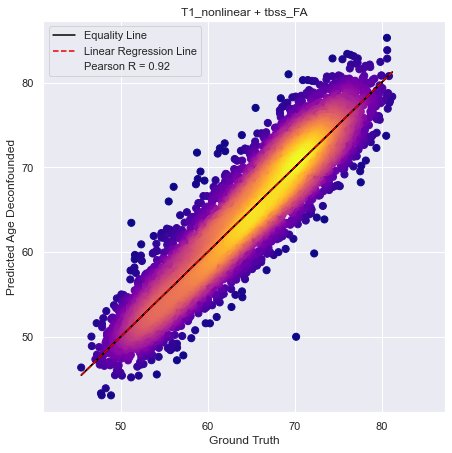

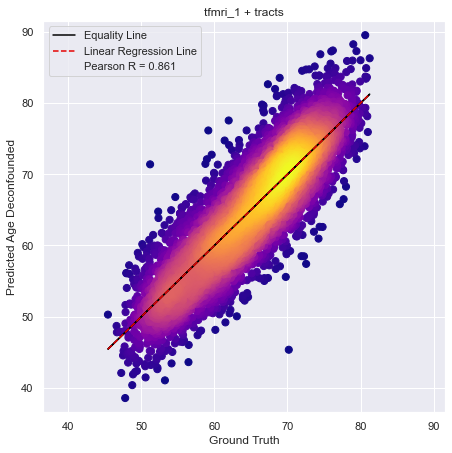

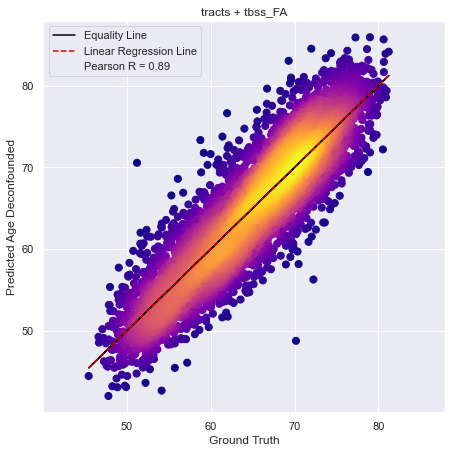

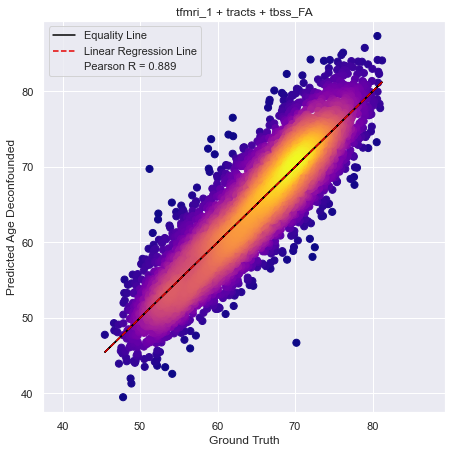

In [12]:
for idx in range(len(ensamble_df)):
    df_mod = ensamble_df.iloc[idx].dataframe
    name_mod = ensamble_df.iloc[idx].modality.split()
    name_ens = ''
    for name in name_mod:
        if name_ens == '':
            name_ens = name
        else:
            name_ens += ' + ' + name
    fig = scatter_plot_heatmap(x=df_mod.target_age, y=df_mod.output_age_decon, xlabel='Ground Truth', 
                               ylabel='Predicted Age Deconfounded', title=name_ens, set_scale=True)

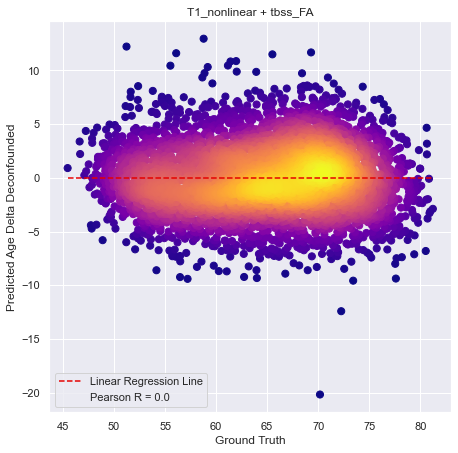

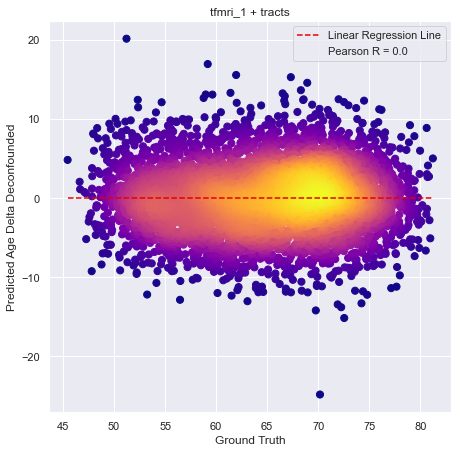

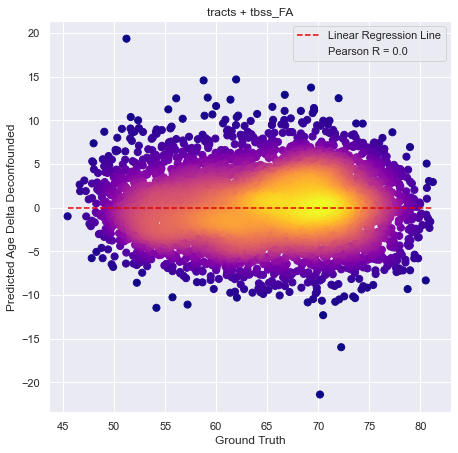

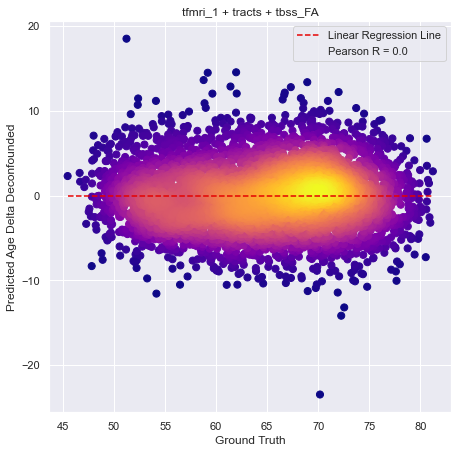

In [13]:
for idx in range(len(ensamble_df)):
    df_mod = ensamble_df.iloc[idx].dataframe
    name_mod = ensamble_df.iloc[idx].modality.split()
    name_ens = ''
    for name in name_mod:
        if name_ens == '':
            name_ens = name
        else:
            name_ens += ' + ' + name
    fig = scatter_plot_heatmap(x=df_mod.target_age, y=df_mod.age_delta_decon, xlabel='Ground Truth', 
                               ylabel='Predicted Age Delta Deconfounded', title=name_ens, set_scale=False, 
                               equality_line=False)

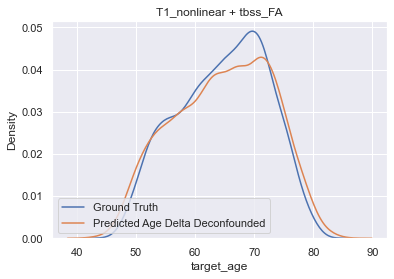

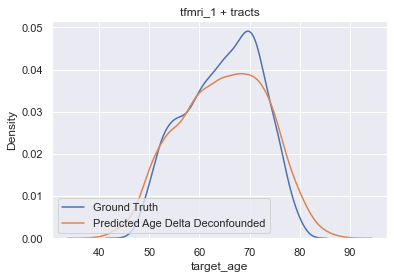

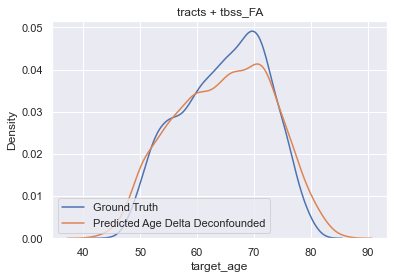

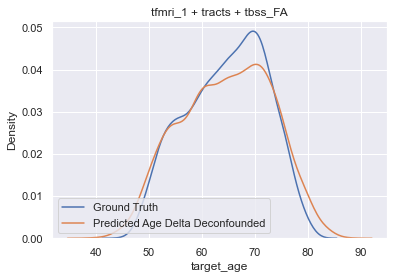

In [14]:
for idx in range(len(ensamble_df)):
    df_mod = ensamble_df.iloc[idx].dataframe
    name_mod = ensamble_df.iloc[idx].modality.split()
    name_ens = ''
    for name in name_mod:
        if name_ens == '':
            name_ens = name
        else:
            name_ens += ' + ' + name
    fig = kde_plot(x=df_mod.target_age, y=df_mod.output_age_decon, xlabel='Ground Truth', 
                   ylabel='Predicted Age Delta Deconfounded', title=name_ens)

----
### NOTES 1:
----

When ensambling various combinations of modalities, the overall MAE does not always go down. In fact, it can generally be observed going down for:
- the cases where sMRI and dMRI modalities are combined
- the cases where rsfMRI or tMRI are combined with the above

When comparing the various plots for the ensambles, no significant changes appear to occur vs. the cases where we are just working with individual modalities. 

----

# 2. Rank Modalities By MAE & Correlations

In [15]:
modality_decon_maes = []

for idx in range(len(df)):
    modality_decon_mae = np.abs(df.iloc[idx].dataframe.age_delta_decon).mean()
    modality_decon_maes.append(modality_decon_mae)
    
mae_df = pd.DataFrame.from_dict({
    'modality': df.modality.to_list(),
    'mae_decon': modality_decon_maes
})


In [16]:
mae_df.sort_values('mae_decon')

,modality,mae_decon
4,T2_nonlinear,2.541832
0,T1_nonlinear,2.665029
1,T1_linear,2.738320
49,tbss_ICVF,3.071851
3,vbm,3.116403
48,tbss_FA,3.146258
56,tbss_OD,3.159359
51,tbss_L1,3.294002
50,tbss_ISOVF,3.295545
54,tbss_MD,3.446519


In [17]:
custom_modalities_2 = ['T2_nonlinear', 'rsfmri_0', 'tfmri_1', 'tracts', 'tbss_ICVF']
# custom_modalities_2 = ['T1_nonlinear', 'T2_nonlinear', 'swi', 'tracts', 'rsfmri_0', 'tfmri_1']
ensamble_df = naive_ensambling(df, custom_modalities=custom_modalities_2, verbose=True)

Modality      : MAE     |  PR    
-----------------------------------------------------------------------------------------------
['T2_nonlinear', 'tbss_ICVF']
T2_nonlinear  :  2.542  |  0.921
tbss_ICVF     :  3.072  |  0.891
Ensamble      :  2.506  |  0.923
------------------------------------------------------------
['tfmri_1', 'tracts']
tfmri_1       :  4.675  |  0.792
tracts        :  3.821  |  0.845
Ensamble      :  3.576  |  0.861
------------------------------------------------------------
['tracts', 'tbss_ICVF']
tracts        :  3.821  |  0.845
tbss_ICVF     :  3.072  |  0.891
Ensamble      :  3.009  |  0.895
------------------------------------------------------------
['tfmri_1', 'tracts', 'tbss_ICVF']
tfmri_1       :  4.675  |  0.792
tracts        :  3.821  |  0.845
tbss_ICVF     :  3.072  |  0.891
Ensamble      :  3.062  |  0.891
------------------------------------------------------------


----
### NOTES 2:
----

Vs. the case from Notes 1, here we selected for each "class" of modality those displaying the lowest MAE. Looking at the "Ensamble" performances, we can observe that these are generally smaller than for our best guess from above. This could suggest that simply picking modalities intuitivelly or by a given metric might not be the most adequate way of approaching this problem. 

----

In [8]:
modalities = df.modality.to_list()
corr_output_age_decons = []
corr_age_delta_decons = []
ensamble_names = []
min_maes = []
ensambled_maes = []

for subset in itertools.combinations(modalities, 2):
    subset = list(subset)
    ensamble_name = subset[0] + ' ' + subset[1]
    ensamble_names.append(ensamble_name)
    
    corr_output_age_decon = pearsonr(df.iloc[modalities.index(subset[0])].dataframe.output_age_decon, 
                                    df.iloc[modalities.index(subset[1])].dataframe.output_age_decon)[0]
    corr_output_age_decons.append(corr_output_age_decon)
    
    corr_age_delta_decon = pearsonr(df.iloc[modalities.index(subset[0])].dataframe.age_delta_decon, 
                                    df.iloc[modalities.index(subset[1])].dataframe.age_delta_decon)[0]
    corr_age_delta_decons.append(corr_age_delta_decon)
    
    min_mae = min(
                    np.abs(df.iloc[modalities.index(subset[0])].dataframe.age_delta_decon).mean(),
                    np.abs(df.iloc[modalities.index(subset[1])].dataframe.age_delta_decon).mean()
    )
    min_maes.append(min_mae)
    
    ensambled_ages_deconfounded = (df.iloc[modalities.index(subset[0])].dataframe.output_age_decon.to_numpy() +
                                  df.iloc[modalities.index(subset[1])].dataframe.output_age_decon.to_numpy()) / 2
    
    ensambled_deltas_deconfounded = np.subtract(
        ensambled_ages_deconfounded,
        df.iloc[modalities.index(subset[0])].dataframe.target_age.to_numpy()    
    )
    
    ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()
    ensambled_maes.append(ensambled_mae)
    
    
    
pr_df = pd.DataFrame.from_dict({
    'ensamble_name': ensamble_names,
    'corr_output_age_decon': corr_output_age_decons,
    'corr_age_delta_decon' : corr_age_delta_decons,
    'min_mae': min_maes,
    'ensambled_mae': ensambled_maes,
})

pr_df['mae_improvements'] = pr_df['min_mae'] - pr_df['ensambled_mae']


In [9]:
pr_df

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
0,T1_nonlinear T1_linear,0.963790,0.783228,2.665029,2.547323,0.117706
1,T1_nonlinear jacobian,0.861121,0.495735,2.665029,3.039536,-0.374507
2,T1_nonlinear vbm,0.931534,0.639493,2.665029,2.608473,0.056556
3,T1_nonlinear T2_nonlinear,0.950010,0.682137,2.541832,2.386541,0.155290
4,T1_nonlinear T2_lesions,0.772443,0.368827,2.665029,3.498095,-0.833066
...,...,...,...,...,...,...
1591,tbss_L3 tbss_MO,0.885548,0.554721,3.523005,3.124228,0.398777
1592,tbss_L3 tbss_OD,0.929301,0.700195,3.159359,3.078182,0.081177
1593,tbss_MD tbss_MO,0.895616,0.587631,3.446519,3.133379,0.313140
1594,tbss_MD tbss_OD,0.935937,0.722452,3.159359,3.063954,0.095405


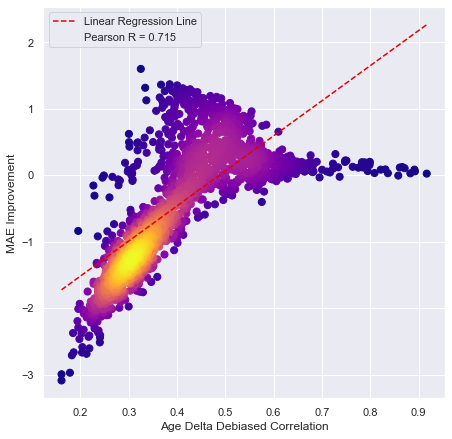

In [10]:
scatter_plot_heatmap(x=pr_df.corr_age_delta_decon, y=pr_df.mae_improvements, 
                     xlabel='Age Delta Debiased Correlation', 
                   ylabel='MAE Improvement', title=None, set_scale=False, 
                   equality_line=False)

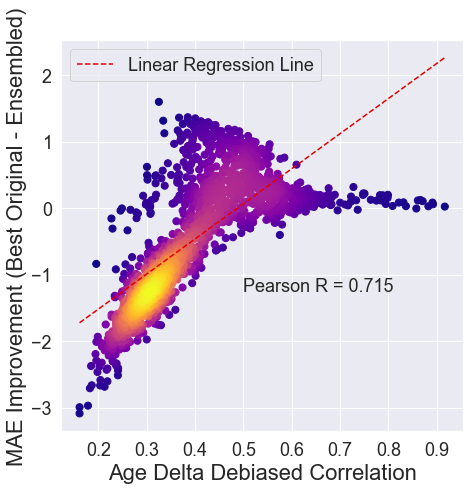

In [11]:
title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(7.2, 7.2)

x=pr_df.corr_age_delta_decon
y=pr_df.mae_improvements
xlabel='Age Delta Debiased Correlation'
ylabel='MAE Improvement (Best Original - Ensembled)'
title=None
set_scale=False 
equality_line=False


if isinstance(x, pd.Series):
    x = x.to_numpy()

if isinstance(y, pd.Series):
    y = y.to_numpy()

fig = plt.figure(figsize=figsize)

sns.set_style("darkgrid", {'image.cmap': u'plasma'})
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
plt.scatter(x,y,c=z,s=50)
if equality_line == True:
    plt.plot(x, x, ls="-", color = sns.xkcd_rgb['black'], label='Equality Line') #this is just the line of equality

X_mat=np.vstack((np.ones(len(x)), x)).T
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
b,w = beta_hat[0],beta_hat[1]
x2 = np.linspace(np.min(x),np.max(x),num=10)
y2 = w * x2 + b
plt.plot(x2,y2,ls='--', color= sns.xkcd_rgb['red'], label='Linear Regression Line')

pearson_correlation = pearsonr(x,y)[0]
text_x = 0.5
text_y = -1.25
lbl = 'Pearson R = '+str(round(pearson_correlation,3))
plt.text(text_x, text_y, lbl, fontsize=legend_font)

if set_scale == True:
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    c_min, c_max = min(x_min, y_min), max(x_max, y_max)
    plt.xlim([c_min-2, c_max+2])
    plt.ylim([c_min-2, c_max+2])

plt.xlabel(xlabel, fontsize = title_font_size)
plt.ylabel(ylabel, fontsize = title_font_size)

plt.xticks(fontsize=ticks_font_size)
plt.yticks(fontsize=ticks_font_size)


# plt.plot([],[],' ',label=lbl)

plt.title(title, fontsize= title_font_size)
plt.legend(fontsize = legend_font)
plt.show()

fig.savefig('Male_Naive_ensembling_mae_improvement_vs_correlation.png', bbox_inches='tight', facecolor='white')



In [21]:
pr_df[pr_df.mae_improvements >= 0.75].sort_values('ensambled_mae')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
1068,rsfmri_17 rsfmri_18,0.738623,0.543029,6.983365,6.145175,0.838191
1035,rsfmri_16 rsfmri_17,0.719822,0.515370,6.983365,6.164050,0.819315
617,rsfmri_5 rsfmri_17,0.738763,0.547093,6.983365,6.211281,0.772084
1036,rsfmri_16 rsfmri_18,0.726371,0.528513,6.994065,6.227520,0.766545
616,rsfmri_5 rsfmri_16,0.711394,0.506571,7.145245,6.229565,0.915681
...,...,...,...,...,...,...
973,rsfmri_14 rsfmri_22,0.577142,0.384941,8.842425,7.475658,1.366767
664,rsfmri_6 rsfmri_21,0.628155,0.452927,8.417786,7.518823,0.898963
657,rsfmri_6 rsfmri_14,0.585122,0.398614,8.842425,7.596466,1.245959
707,rsfmri_7 rsfmri_22,0.532762,0.356772,9.068116,8.101511,0.966605


In [22]:
pr_df[pr_df.mae_improvements >= 0.0]

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
0,T1_nonlinear T1_linear,0.963790,0.783228,2.665029,2.547323,0.117706
2,T1_nonlinear vbm,0.931534,0.639493,2.665029,2.608473,0.056556
3,T1_nonlinear T2_nonlinear,0.950010,0.682137,2.541832,2.386541,0.155290
47,T1_nonlinear tbss_FA,0.914905,0.555382,2.665029,2.566993,0.098036
48,T1_nonlinear tbss_ICVF,0.919444,0.567774,2.665029,2.526971,0.138058
...,...,...,...,...,...,...
1591,tbss_L3 tbss_MO,0.885548,0.554721,3.523005,3.124228,0.398777
1592,tbss_L3 tbss_OD,0.929301,0.700195,3.159359,3.078182,0.081177
1593,tbss_MD tbss_MO,0.895616,0.587631,3.446519,3.133379,0.313140
1594,tbss_MD tbss_OD,0.935937,0.722452,3.159359,3.063954,0.095405


In [23]:
pr_df[(pr_df.mae_improvements >= -1) & (pr_df.mae_improvements <= -0.5)].sort_values('ensambled_mae')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
250,T2_nonlinear tfmri_c_5,0.823765,0.388921,2.541832,3.047554,-0.505722
246,T2_nonlinear tfmri_2,0.807543,0.365667,2.541832,3.127172,-0.585340
32,T1_nonlinear tfmri_2,0.809248,0.378879,2.665029,3.176647,-0.511618
247,T2_nonlinear tfmri_5,0.803310,0.378314,2.541832,3.220671,-0.678839
87,T1_linear tfmri_2,0.818445,0.418536,2.738320,3.244049,-0.505729
...,...,...,...,...,...,...
1273,rsfmri_24 tfmri_5,0.669139,0.419530,5.027084,5.716687,-0.689603
669,rsfmri_6 tfmri_2,0.567026,0.265877,4.846089,5.754156,-0.908067
1222,rsfmri_22 tfmri_5,0.578412,0.287379,5.027084,5.784209,-0.757125
670,rsfmri_6 tfmri_5,0.588075,0.310441,5.027084,5.825925,-0.798841


----
### NOTES 3:
----

What I have done here is take all the possible combinations of 2 modalities that are possible and ensamble then. I wanted to test the hypothesis proposed by Han, which is that the MAE improvement is greater when the correlation between deltas is smaller. 

As it can be observed from the plot, this isn't necessarily the case. In fact, the smaller the correlations between the deltas, the smaller the improvement in MAE for combinations of 2 modalities. This can also lead to negative improvements, although this isn't necessarily an indication of a degradation in biological meaningfulness. 

2 distinct groups showing high improvements (> 0.5-0.75) for low and medium correlations can be observed. These can be traced back to the dataset as being
* ensambles of the T2_lessions with various rsfmri modalities, which have very low correlations ~0.3
* ensambles of the rsfMRI modalities, generally having correlations of about ~0.5-0.6 between themselves.

***TO CHECK: LOOK AT ENSAMBLING ELEMENTS FROM THE VARIOUS GROUPS, SUCH AS RSFMRI BETWEEN THEMSELVES (IE. HIGHLY CORRELATED DATA, AND THEN USE THOSE AS A "SEPARATE MODALITY"***


----

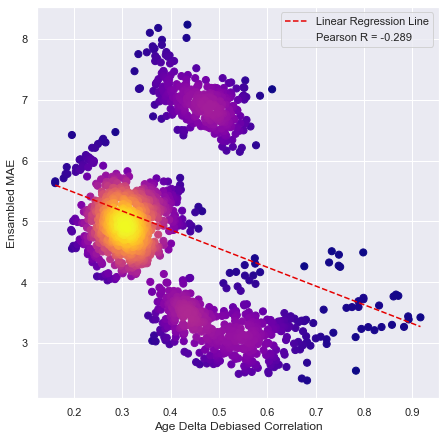

In [24]:
scatter_plot_heatmap(x=pr_df.corr_age_delta_decon, y=pr_df.ensambled_mae, 
                     xlabel='Age Delta Debiased Correlation', 
                   ylabel='Ensambled MAE', title=None, set_scale=False, 
                   equality_line=False)

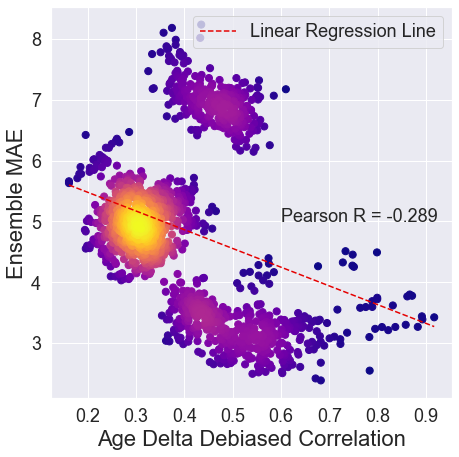

In [13]:
title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(7.2, 7.2)

x=pr_df.corr_age_delta_decon
y=pr_df.ensambled_mae
xlabel='Age Delta Debiased Correlation'
ylabel='Ensemble MAE'
title=None
set_scale=False 
equality_line=False


if isinstance(x, pd.Series):
    x = x.to_numpy()

if isinstance(y, pd.Series):
    y = y.to_numpy()

fig = plt.figure(figsize=figsize)

sns.set_style("darkgrid", {'image.cmap': u'plasma'})
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
plt.scatter(x,y,c=z,s=50)
if equality_line == True:
    plt.plot(x, x, ls="-", color = sns.xkcd_rgb['black'], label='Equality Line') #this is just the line of equality

X_mat=np.vstack((np.ones(len(x)), x)).T
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
b,w = beta_hat[0],beta_hat[1]
x2 = np.linspace(np.min(x),np.max(x),num=10)
y2 = w * x2 + b
plt.plot(x2,y2,ls='--', color= sns.xkcd_rgb['red'], label='Linear Regression Line')

pearson_correlation = pearsonr(x,y)[0]
text_x = 0.6
text_y = 5
lbl = 'Pearson R = '+str(round(pearson_correlation,3))
plt.text(text_x, text_y, lbl, fontsize=legend_font)

if set_scale == True:
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    c_min, c_max = min(x_min, y_min), max(x_max, y_max)
    plt.xlim([c_min-2, c_max+2])
    plt.ylim([c_min-2, c_max+2])

plt.xlabel(xlabel, fontsize = title_font_size)
plt.ylabel(ylabel, fontsize = title_font_size)

plt.xticks(fontsize=ticks_font_size)
plt.yticks(fontsize=ticks_font_size)


# plt.plot([],[],' ',label=lbl)

plt.title(title, fontsize= title_font_size)
plt.legend(fontsize = legend_font)
plt.show()

fig.savefig('Male_Naive_ensembling_ensemble_mae_vs_correlation.png', bbox_inches='tight', facecolor='white')




In [25]:
# pr_df[pr_df.ensambled_mae <= 2.5].sort_values('ensambled_mae')
pr_df[(pr_df.ensambled_mae <= 2.5) & (pr_df.mae_improvements > 0)].sort_values('ensambled_mae')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
3,T1_nonlinear T2_nonlinear,0.950010,0.682137,2.541832,2.386541,0.155290
58,T1_linear T2_nonlinear,0.946876,0.671301,2.541832,2.418901,0.122931
261,T2_nonlinear tbss_FA,0.914163,0.540614,2.541832,2.495044,0.046788


In [26]:
pr_df[(pr_df.ensambled_mae >= 5) & (pr_df.mae_improvements > 0)].sort_values('ensambled_mae')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
288,T2_lesions rsfmri_17,0.644149,0.317482,5.582289,5.101373,0.480916
287,T2_lesions rsfmri_16,0.628875,0.301568,5.582289,5.154477,0.427812
289,T2_lesions rsfmri_18,0.665703,0.363130,5.582289,5.199355,0.382934
276,T2_lesions rsfmri_5,0.648467,0.337170,5.582289,5.246120,0.336169
271,T2_lesions rsfmri_0,0.628658,0.319362,5.582289,5.380651,0.201638
...,...,...,...,...,...,...
705,rsfmri_7 rsfmri_20,0.556675,0.381936,8.603498,7.985874,0.617624
706,rsfmri_7 rsfmri_21,0.595334,0.432623,8.417786,8.017072,0.400714
707,rsfmri_7 rsfmri_22,0.532762,0.356772,9.068116,8.101511,0.966605
650,rsfmri_6 rsfmri_7,0.544125,0.374078,9.238483,8.181280,1.057203


In [27]:
pr_df[(pr_df.ensambled_mae >= 3.75) & (pr_df.ensambled_mae <= 4.25) & (pr_df.mae_improvements > 0)].sort_values('ensambled_mae')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
1353,tfmri_5 tbss_MD_s,0.789692,0.413601,3.881918,3.760022,0.121896
1506,tbss_L2_s tbss_MD_s,0.958854,0.861021,3.881918,3.767262,0.114656
1346,tfmri_5 tracts,0.795743,0.425081,3.821289,3.775532,0.045757
1518,tbss_L3_s tbss_MD_s,0.961654,0.870963,3.881918,3.777518,0.104400
1351,tfmri_5 tbss_L2_s,0.795801,0.431475,3.920460,3.785529,0.134931
1505,tbss_L2_s tbss_L3_s,0.960187,0.866122,3.920460,3.798563,0.121897
1352,tfmri_5 tbss_L3_s,0.795968,0.433238,3.939030,3.802278,0.136752
348,swi tfmri_5,0.795046,0.430735,3.942241,3.815296,0.126945
1349,tfmri_5 tbss_ISOVF_s,0.798181,0.440800,3.932509,3.817832,0.114677
1354,tfmri_5 tbss_MO_s,0.786384,0.414743,4.089958,3.851580,0.238378


----
### NOTES 4:
----

Carrying out from above, we also looked at how the ensambled MAE changes with the degree of correlation between the two components. Here again, we observe some clusters forming., but generally no clear trend can be established.

Looking at the ensambles which both showed positive improvements *and* low MAE values, we can observe that these are generally ensambles of T1 NL, T2 NL, TBSS, T1L and VBM modalities, which already displayed low values of MAE to start with. 


***TO CHECK: INVESTIGATE THE OTHER CLUSTERS. CAN WE LEARN ANYTHING FROM THEM?"*** - DONE


----

In [28]:
modalities = df.modality.to_list()
corr_output_age_decons = []
corr_age_delta_decons = []
ensamble_names = []
min_maes = []
ensambled_maes = []

for subset in itertools.combinations(modalities, 3):
    subset = list(subset)
    ensamble_name = subset[0] + ' ' + subset[1] + ' ' + subset[2]
    ensamble_names.append(ensamble_name)
    
    corr_output_age_decon1 = pearsonr(df.iloc[modalities.index(subset[0])].dataframe.output_age_decon, 
                                    df.iloc[modalities.index(subset[1])].dataframe.output_age_decon,
                                    )[0]
    corr_output_age_decon2 = pearsonr(df.iloc[modalities.index(subset[0])].dataframe.output_age_decon, 
                                    df.iloc[modalities.index(subset[2])].dataframe.output_age_decon)[0]
    corr_output_age_decon3 = pearsonr(df.iloc[modalities.index(subset[1])].dataframe.output_age_decon,
                                    df.iloc[modalities.index(subset[2])].dataframe.output_age_decon)[0]
    
    corr_output_age_decons.append(min(corr_output_age_decon1, corr_output_age_decon2, corr_output_age_decon3))
    
    corr_age_delta_decon1 = pearsonr(df.iloc[modalities.index(subset[0])].dataframe.age_delta_decon, 
                                    df.iloc[modalities.index(subset[1])].dataframe.age_delta_decon)[0]
    corr_age_delta_decon2 = pearsonr(df.iloc[modalities.index(subset[0])].dataframe.age_delta_decon, 
                                    df.iloc[modalities.index(subset[2])].dataframe.age_delta_decon)[0]
    corr_age_delta_decon3 = pearsonr(df.iloc[modalities.index(subset[1])].dataframe.age_delta_decon,
                                    df.iloc[modalities.index(subset[2])].dataframe.age_delta_decon)[0]
    
    corr_age_delta_decons.append(min(corr_age_delta_decon1, corr_age_delta_decon2, corr_age_delta_decon3))
    
    min_mae = min(
                    np.abs(df.iloc[modalities.index(subset[0])].dataframe.age_delta_decon).mean(),
                    np.abs(df.iloc[modalities.index(subset[1])].dataframe.age_delta_decon).mean(),
                    np.abs(df.iloc[modalities.index(subset[2])].dataframe.age_delta_decon).mean()
    )
    min_maes.append(min_mae)
    
    ensambled_ages_deconfounded = (df.iloc[modalities.index(subset[0])].dataframe.output_age_decon.to_numpy() +
                                  df.iloc[modalities.index(subset[1])].dataframe.output_age_decon.to_numpy() +
                                  df.iloc[modalities.index(subset[2])].dataframe.output_age_decon.to_numpy()) / 3
    
    ensambled_deltas_deconfounded = np.subtract(
        ensambled_ages_deconfounded,
        df.iloc[modalities.index(subset[0])].dataframe.target_age.to_numpy()    
    )
    
    ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()
    ensambled_maes.append(ensambled_mae)
    
    
    
pr_df_3 = pd.DataFrame.from_dict({
    'ensamble_name': ensamble_names,
    'corr_output_age_decon': corr_output_age_decons,
    'corr_age_delta_decon' : corr_age_delta_decons,
    'min_mae': min_maes,
    'ensambled_mae': ensambled_maes,
})

pr_df_3['mae_improvements'] = pr_df_3['min_mae'] - pr_df_3['ensambled_mae']



In [29]:
pr_df_3

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
0,T1_nonlinear T1_linear jacobian,0.861121,0.495735,2.665029,2.781115,-0.116086
1,T1_nonlinear T1_linear vbm,0.931534,0.639493,2.665029,2.530875,0.134154
2,T1_nonlinear T1_linear T2_nonlinear,0.946876,0.671301,2.541832,2.383040,0.158792
3,T1_nonlinear T1_linear T2_lesions,0.772443,0.368827,2.665029,2.987927,-0.322898
4,T1_nonlinear T1_linear swi,0.867564,0.459552,2.665029,2.615780,0.049250
...,...,...,...,...,...,...
29255,tbss_L2 tbss_MO tbss_OD,0.888708,0.570482,3.159359,2.985119,0.174240
29256,tbss_L3 tbss_MD tbss_MO,0.885548,0.554721,3.446519,3.114789,0.331730
29257,tbss_L3 tbss_MD tbss_OD,0.929301,0.700195,3.159359,3.115470,0.043889
29258,tbss_L3 tbss_MO tbss_OD,0.885548,0.554721,3.159359,2.960364,0.198995


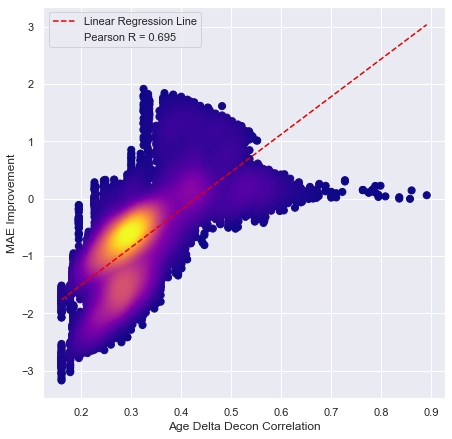

In [30]:
scatter_plot_heatmap(x=pr_df_3.corr_age_delta_decon, y=pr_df_3.mae_improvements, 
                     xlabel='Age Delta Decon Correlation', 
                   ylabel='MAE Improvement', title=None, set_scale=False, 
                   equality_line=False)

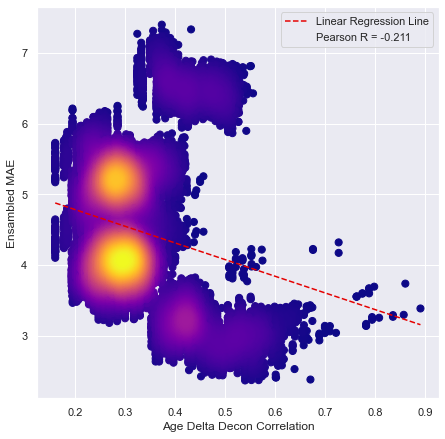

In [31]:
scatter_plot_heatmap(x=pr_df_3.corr_age_delta_decon, y=pr_df_3.ensambled_mae, 
                     xlabel='Age Delta Decon Correlation', 
                   ylabel='Ensambled MAE', title=None, set_scale=False, 
                   equality_line=False)

In [32]:
# pr_df_3[pr_df_3.ensambled_mae <= 2.5].sort_values('ensambled_mae')
pr_df_3[(pr_df_3.ensambled_mae <= 2.3) & (pr_df_3.mae_improvements > 0)].sort_values('ensambled_mae')
# pr_df_3[(pr_df_3.mae_improvements <= -1.75)].sort_values('mae_improvements')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements


In [33]:
pr_df_3[(pr_df_3.mae_improvements <= -1.75)].sort_values('mae_improvements')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
6263,T2_nonlinear rsfmri_7 rsfmri_14,0.512364,0.160989,2.541832,5.711711,-3.169879
6214,T2_nonlinear rsfmri_6 rsfmri_7,0.512364,0.160989,2.541832,5.691029,-3.149197
6271,T2_nonlinear rsfmri_7 rsfmri_22,0.512364,0.160989,2.541832,5.654945,-3.113113
643,T1_nonlinear rsfmri_7 rsfmri_14,0.511239,0.161020,2.665029,5.728345,-3.063316
594,T1_nonlinear rsfmri_6 rsfmri_7,0.511239,0.161020,2.665029,5.713806,-3.048777
...,...,...,...,...,...,...
4719,vbm rsfmri_2 rsfmri_16,0.609602,0.251174,3.116403,4.867273,-1.750870
26025,rsfmri_22 rsfmri_24 tbss_OD_s,0.591061,0.282490,3.659745,5.410295,-1.750550
10047,rsfmri_0 rsfmri_9 tbss_FA,0.655979,0.304068,3.146258,4.896681,-1.750424
19803,rsfmri_10 rsfmri_24 tbss_FA_s,0.617637,0.280709,3.646106,5.396449,-1.750343


In [34]:
pr_df_3[pr_df_3.mae_improvements >= 1].sort_values('ensambled_mae')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
23276,rsfmri_16 rsfmri_17 rsfmri_18,0.719822,0.515370,6.983365,5.865945,1.117421
15455,rsfmri_5 rsfmri_16 rsfmri_17,0.711394,0.506571,6.983365,5.881037,1.102328
15488,rsfmri_5 rsfmri_17 rsfmri_18,0.738623,0.543029,6.983365,5.898287,1.085078
15456,rsfmri_5 rsfmri_16 rsfmri_18,0.711394,0.506571,6.994065,5.917702,1.076363
10308,rsfmri_0 rsfmri_17 rsfmri_18,0.714056,0.515325,6.983365,5.932461,1.050904
...,...,...,...,...,...,...
17155,rsfmri_7 rsfmri_14 rsfmri_20,0.556675,0.381936,8.603498,7.289081,1.314418
17157,rsfmri_7 rsfmri_14 rsfmri_22,0.532762,0.356772,8.842425,7.312548,1.529876
16029,rsfmri_6 rsfmri_7 rsfmri_21,0.544125,0.374078,8.417786,7.325932,1.091855
17156,rsfmri_7 rsfmri_14 rsfmri_21,0.592166,0.432623,8.417786,7.332193,1.085593


In [35]:
pr_df_3[pr_df_3.mae_improvements >= 0]

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
1,T1_nonlinear T1_linear vbm,0.931534,0.639493,2.665029,2.530875,0.134154
2,T1_nonlinear T1_linear T2_nonlinear,0.946876,0.671301,2.541832,2.383040,0.158792
4,T1_nonlinear T1_linear swi,0.867564,0.459552,2.665029,2.615780,0.049250
36,T1_nonlinear T1_linear tracts,0.877187,0.481896,2.665029,2.612445,0.052584
37,T1_nonlinear T1_linear tbss_FA_s,0.884007,0.481327,2.665029,2.564533,0.100496
...,...,...,...,...,...,...
29255,tbss_L2 tbss_MO tbss_OD,0.888708,0.570482,3.159359,2.985119,0.174240
29256,tbss_L3 tbss_MD tbss_MO,0.885548,0.554721,3.446519,3.114789,0.331730
29257,tbss_L3 tbss_MD tbss_OD,0.929301,0.700195,3.159359,3.115470,0.043889
29258,tbss_L3 tbss_MO tbss_OD,0.885548,0.554721,3.159359,2.960364,0.198995


----
### NOTES 5:
----

I repeated the previous anslysis, but only this time using ensambles of 3 modalities. These took a few minutes to compute, leading to my commenting them out so not to have long runtimes if the notebook is to be rerun later.

One note - instead of having the PR between 2 modalities, as we are using 3, the x axis is given by the smallest PR between the combination of 3 modalities. 

The obversations previously made remain generally valid:
* the best MAEs are seen when ensambling sMRI and dMRI measures.
* the best improvements are generally seen for combinations of T2 leasions and rsfmri data. 

This could suggest that ensambling these highly correlated classes first could be beneficial.

----

In [ ]:
Ensamble all
Ensamble all pregresivelly based on MAE increase
Ensamble all progresivelly based on correlation to GT
Ensamble all progresivelly based on between correlation (?)
Make some notes on what I am seeing! 

# 3. Ensamble all

3.6336549563465503 0.8563220205473646


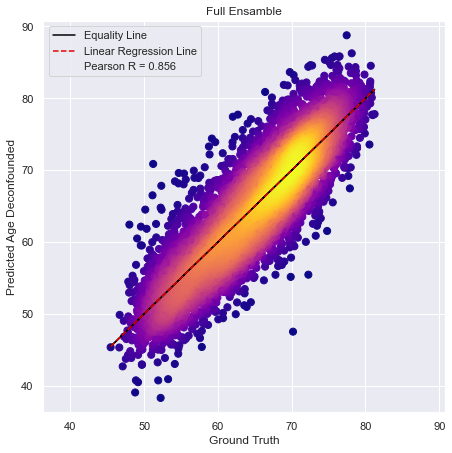

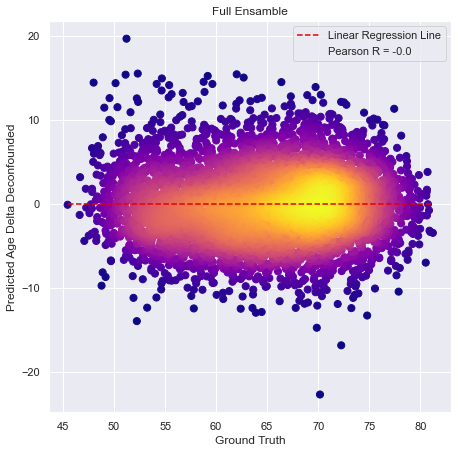

In [36]:
ensambled_ages_deconfounded = None

for idx in range(len(df)):
    if ensambled_ages_deconfounded is None:
        ensambled_ages_deconfounded = df.iloc[idx].dataframe.output_age_decon.to_numpy()
    else:
        ensambled_ages_deconfounded = np.add(ensambled_ages_deconfounded,
                                            df.iloc[idx].dataframe.output_age_decon.to_numpy())

ensambled_ages_deconfounded = ensambled_ages_deconfounded / len(df)

ensambled_deltas_deconfounded = np.subtract(
        ensambled_ages_deconfounded,
        df.iloc[0].dataframe.target_age.to_numpy()    
    )

ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()

ensambled_pr = pearsonr(ensambled_ages_deconfounded, 
                        df.iloc[0].dataframe.target_age.to_numpy())[0]

print(ensambled_mae, ensambled_pr)

scatter_plot_heatmap(x=df.iloc[0].dataframe.target_age, y=ensambled_ages_deconfounded, xlabel='Ground Truth', 
                   ylabel='Predicted Age Deconfounded', title='Full Ensamble', set_scale=True)

scatter_plot_heatmap(x=df.iloc[0].dataframe.target_age, y=ensambled_deltas_deconfounded, xlabel='Ground Truth', 
                   ylabel='Predicted Age Delta Deconfounded', title='Full Ensamble', set_scale=False, 
                   equality_line=False)

# 3.1. Ensamble All - Test A/B

In [9]:
from sklearn.model_selection import train_test_split

df_test = {}
df_test['Unnamed: 0'] = df.iloc[0].dataframe['Unnamed: 0'].to_list()
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_output_age.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)
df_test['target_age'] = df.iloc[0].dataframe.target_age.to_list()

df_testA, df_testB = train_test_split(df_test, test_size=0.5, random_state=1)
subjects_testA = df_testA['Unnamed: 0'].to_list()
subjects_testB = df_testB['Unnamed: 0'].to_list()
df_testA = df_testA.drop(labels='Unnamed: 0', axis=1)
df_testB = df_testB.drop(labels='Unnamed: 0', axis=1)

# df_train = df_testA
# df_test = df_testB

In [10]:
df_testB

,T1_nonlinear,T1_linear,jacobian,vbm,T2_nonlinear,T2_lesions,swi,rsfmri_0,rsfmri_1,rsfmri_2,...,tbss_FA,tbss_ICVF,tbss_ISOVF,tbss_L1,tbss_L2,tbss_L3,tbss_MD,tbss_MO,tbss_OD,target_age
1995,70.301960,71.880307,69.838718,73.728143,73.898550,72.442627,66.486627,64.960093,69.834643,62.343770,...,64.774132,72.619850,71.585567,73.181622,73.025147,74.976455,71.628845,69.588323,74.340763,77.611986
2682,65.544842,63.974553,62.261400,63.022292,67.380870,61.355960,65.141727,66.513993,69.161137,60.986258,...,63.446062,65.282101,65.646513,65.543627,66.599290,66.317293,65.595615,65.108424,65.091057,62.389384
1117,65.903570,65.495730,61.712228,65.155408,63.115961,64.414018,59.111989,61.315363,59.037748,60.713749,...,62.385809,64.182630,62.296586,66.467493,66.108393,66.276078,65.761343,63.206968,65.244336,66.140753
2651,69.497883,73.795662,68.981087,66.932085,68.470500,72.342867,67.238942,67.130893,71.601157,68.807543,...,70.124750,69.249878,70.717260,68.251463,71.317583,71.792955,70.097964,69.983847,69.884533,68.352169
2346,53.809285,57.470562,60.224921,56.306926,59.614605,57.104562,63.387025,57.299523,60.204006,62.027384,...,55.425612,56.049117,58.145698,59.213595,61.731932,62.031764,61.779696,58.838508,57.769367,50.348973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,58.127292,59.689068,57.491843,59.517367,59.671097,57.565237,55.377126,59.178331,67.728268,58.032945,...,59.179996,59.087458,59.631650,58.824253,57.938867,58.437140,57.324593,58.506098,55.911863,58.971575
4252,63.790021,62.675925,64.212458,58.628510,66.333018,64.013467,67.707710,67.328173,64.016683,67.985675,...,68.519455,67.173382,63.576578,64.274057,65.594261,63.615145,64.735662,62.600780,66.191178,59.511073
3414,71.042877,70.315125,66.095701,69.088955,68.649700,70.849309,68.011757,68.343983,66.951587,64.070481,...,65.988992,63.606984,67.215815,70.601620,70.517665,72.906408,70.933847,65.636721,68.217203,66.540297
2500,73.908975,71.296365,77.109477,73.524108,70.520263,73.622251,72.195787,66.556900,66.139747,67.053963,...,73.202405,67.713974,73.930532,76.096647,75.686733,74.907872,74.032945,74.837657,76.123213,74.999886


<class 'numpy.ndarray'>
[68.21351105 64.3791354  63.84980749 ... 67.10434038 70.32001133
 60.19241214]
[-9.39847525  1.98975184 -2.29094594 ...  0.56404358 -4.67987452
  3.03065415]
3.127146155861876 0.8858001090191784


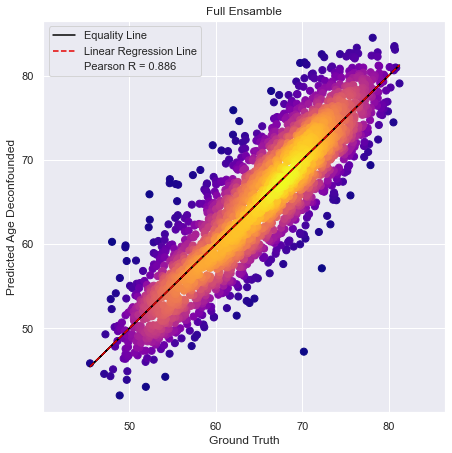

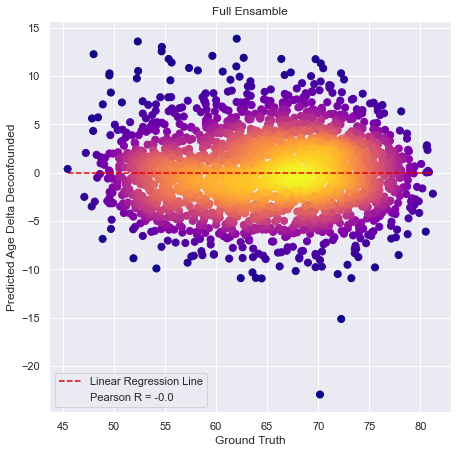

In [11]:
ensambled_ages_deconfounded = None

for column in df_testB.columns[:-1]:
    if ensambled_ages_deconfounded is None:
        ensambled_ages_deconfounded = df_testB[column].to_numpy()
    else:
        ensambled_ages_deconfounded = np.add(ensambled_ages_deconfounded,
                                            df_testB[column].to_numpy())

ensambled_ages_deconfounded = ensambled_ages_deconfounded / len(df)

mean_output_age = np.copy(ensambled_ages_deconfounded)
target_age = df_testB['target_age'].values

print(type(target_age))
print(ensambled_ages_deconfounded)

mean_age_delta = np.subtract(
        mean_output_age,
        df_testB['target_age'].to_numpy())

print(mean_age_delta)

ensambled_ages_deconfounded = age_deconfounding(ensambled_ages_deconfounded, df_testB['target_age'].to_numpy())

ensambled_deltas_deconfounded = np.subtract(
        ensambled_ages_deconfounded,
        df_testB['target_age'].to_numpy())

ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()

ensambled_pr = pearsonr(ensambled_ages_deconfounded, 
                        df_testB['target_age'].to_numpy())[0]

print(ensambled_mae, ensambled_pr)

scatter_plot_heatmap(x=df_testB['target_age'], y=ensambled_ages_deconfounded, xlabel='Ground Truth', 
                   ylabel='Predicted Age Deconfounded', title='Full Ensamble', set_scale=True)

scatter_plot_heatmap(x=df_testB['target_age'], y=ensambled_deltas_deconfounded, xlabel='Ground Truth', 
                   ylabel='Predicted Age Delta Deconfounded', title='Full Ensamble', set_scale=False, 
                   equality_line=False)

In [12]:
df_output = pd.DataFrame.from_dict({
    'modality': 'NaiveFull',
    'dataframe': [pd.DataFrame.from_dict({
                'Unnamed: 0': subjects_testB,
                'age_delta_decon': ensambled_deltas_deconfounded,
                'mean_age_delta': mean_age_delta,
                'target_age': target_age,
                'mean_output_age': mean_output_age
                })]
})

output_name = 'male_ensembles_testset.pkl'

if os.path.exists(output_name):
    df_ensambles = pd.read_pickle(output_name)
    if df_output.iloc[0].modality in df_ensambles.modality.to_list():
        pass
    else:
        df_ensambles = pd.concat([df_ensambles, df_output])
        df_ensambles.to_pickle(output_name, protocol = 4)
else:
    df_output.to_pickle(output_name, protocol = 4)
    
df_ensambles = pd.read_pickle(output_name)
df_ensambles.iloc[0].dataframe

,Unnamed: 0,age_delta_decon,mean_age_delta,target_age,mean_output_age
0,22840726,-6.685842,-9.398475,77.611986,68.213511
1,22538138,1.670185,1.989752,62.389384,64.379135
2,23586213,-3.029102,-2.290946,66.140753,63.849807
3,23759858,2.615197,-0.115639,68.352169,68.236530
4,22751665,4.423963,8.844400,50.348973,59.193372
...,...,...,...,...,...
2178,22793991,-2.679347,1.070187,58.971575,60.041763
2179,22995420,5.161261,5.210238,59.511073,64.721311
2180,21876262,2.399551,0.564044,66.540297,67.104340
2181,24605415,-0.301434,-4.679875,74.999886,70.320011


In [13]:
df_ensambles

,modality,dataframe
0,NaiveFull,Unnamed: 0 age_delta_decon mean_age_de...


----
### NOTES 6:
----

In the following, I did something trivial: ensamble all the modalities, either in one go, or progresivelly based on increasing and decreasing MAE.

The whole ensamble MAE and PR can be see above - they are lower than those of the best performing modalities, but higher than a large part of the other modaltieis.

Below, it can be observed that ensambling the rsfmri modalities generally leads to performance improvements (3.2), while ensambling the better performing modalities generally leads to small improvements followed by a degradation in performance as more modalities are added in (3.1)

----

## 3.1. Ensamble all based on MAE Increase

In [41]:
mae_df = mae_df.sort_values('mae_decon', ascending=True)

In [42]:
mae_df

,modality,mae_decon
4,T2_nonlinear,2.541832
0,T1_nonlinear,2.665029
1,T1_linear,2.738320
49,tbss_ICVF,3.071851
3,vbm,3.116403
48,tbss_FA,3.146258
56,tbss_OD,3.159359
51,tbss_L1,3.294002
50,tbss_ISOVF,3.295545
54,tbss_MD,3.446519


In [43]:
ordered_modalities = mae_df.modality.to_list()
maes_list = []
prs_list = []

df.iloc[modalities.index(subset[0])]

for i in range(2, len(mae_df)+1):
    ensambled_ages_deconfounded = None
    for j in range(i):
        if ensambled_ages_deconfounded is None:
            ensambled_ages_deconfounded = df.iloc[modalities.index(ordered_modalities[j])].dataframe.output_age_decon.to_numpy()
        else:
            ensambled_ages_deconfounded = np.add(ensambled_ages_deconfounded,
                                            df.iloc[modalities.index(ordered_modalities[j])].dataframe.output_age_decon.to_numpy())
            
    ensambled_ages_deconfounded = ensambled_ages_deconfounded / i

    ensambled_deltas_deconfounded = np.subtract(
            ensambled_ages_deconfounded,
            df.iloc[0].dataframe.target_age.to_numpy()    
        )

    ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()
    maes_list.append(ensambled_mae)

    ensambled_pr = pearsonr(ensambled_ages_deconfounded, 
                            df.iloc[0].dataframe.target_age.to_numpy())[0]
    prs_list.append(ensambled_pr)
    

Text(0, 0.5, 'Ensambled Pearson R')

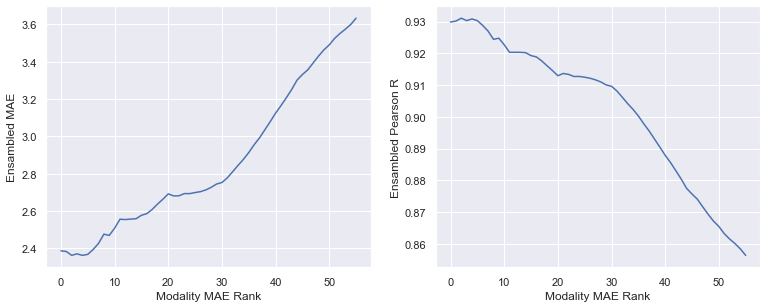

In [44]:
plt.figure(figsize=(12.8, 4.8))
plt.subplot(121)
plt.plot(maes_list)
plt.xlabel('Modality MAE Rank')
plt.ylabel('Ensambled MAE')

plt.subplot(122)
plt.plot(prs_list)
plt.xlabel('Modality MAE Rank')
plt.ylabel('Ensambled Pearson R')

## 3.2. Ensamble based on MSE Decrease

Text(0, 0.5, 'Ensambled Pearson R')

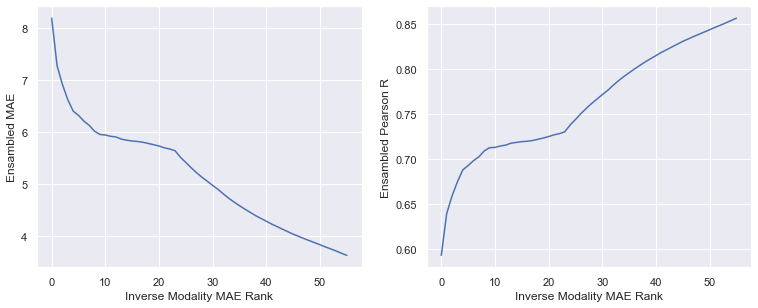

In [45]:
mae_df = mae_df.sort_values('mae_decon', ascending=False)

ordered_modalities = mae_df.modality.to_list()
maes_list = []
prs_list = []

# df.iloc[modalities.index(subset[0])]

for i in range(2, len(mae_df)+1):
    ensambled_ages_deconfounded = None
    for j in range(i):
        if ensambled_ages_deconfounded is None:
            ensambled_ages_deconfounded = df.iloc[modalities.index(ordered_modalities[j])].dataframe.output_age_decon.to_numpy()
        else:
            ensambled_ages_deconfounded = np.add(ensambled_ages_deconfounded,
                                            df.iloc[modalities.index(ordered_modalities[j])].dataframe.output_age_decon.to_numpy())
            
    ensambled_ages_deconfounded = ensambled_ages_deconfounded / i

    ensambled_deltas_deconfounded = np.subtract(
            ensambled_ages_deconfounded,
            df.iloc[0].dataframe.target_age.to_numpy()    
        )

    ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()
    maes_list.append(ensambled_mae)

    ensambled_pr = pearsonr(ensambled_ages_deconfounded, 
                            df.iloc[0].dataframe.target_age.to_numpy())[0]
    prs_list.append(ensambled_pr)
    
plt.figure(figsize=(12.8, 4.8))
plt.subplot(121)
plt.plot(maes_list)
plt.xlabel('Inverse Modality MAE Rank')
plt.ylabel('Ensambled MAE')

plt.subplot(122)
plt.plot(prs_list)
plt.xlabel('Inverse Modality MAE Rank')
plt.ylabel('Ensambled Pearson R')

In [46]:
maes_list[-1]

3.6336549563465503

In [47]:
mae_df

,modality,mae_decon
14,rsfmri_7,10.598288
13,rsfmri_6,9.238483
29,rsfmri_22,9.068116
21,rsfmri_14,8.842425
27,rsfmri_20,8.603498
9,rsfmri_2,8.492751
28,rsfmri_21,8.417786
17,rsfmri_10,8.365962
30,rsfmri_23,8.352616
10,rsfmri_3,8.315296


----
### NOTES 7:
----

It's starting to become clear that a trivial approach to ensambling isn't necessarily the most appropriate one. The above ***TO DOs*** should be tried.

Simply ansambling based on one arbitrary metric - MAE - does not necessarily capture any biological variability! 

Other things worth trying:
- Use the modalities which show improvements after a 2x ensambling, and test adding a 3rd, 4th etc. layer of ensambling, retaining only those combinations which show a +ve improvement in MAE (ie. a reduction). Print out the combinations at each level (or save them some other way).
- Look at ensambling highly correlated clusters, and use those as a "single" modality if they are showing improvements afterwards.
- Segregate modalities into different classes (sMRI, rsfMRI etc..), and the pick from each of thses classes a modality

Then, move into the next form of naive ensambling - data blending. For this, I will need a new set of datasets, with the training data values. 

My feeling thus far is that the best way of approaching this lies in first looking into the nIDP correlations, identifying modalities which correlate with other, nIDPs than their peers, and then use those for any ensambling experiements, either trivial or using regression. 

----

# 4. Progresivelly Ensamble based on MAE Improvement

In [48]:
improvements_after_2 = pr_df[pr_df.mae_improvements >= 0.0].ensamble_name.to_list()

In [49]:
ensamble_names = []
original_maes = []
new_maes = []

for item in improvements_after_2:
    items = item.split()
    original_ensamble = np.add(df.iloc[modalities.index(items[0])].dataframe.output_age_decon.to_numpy(),
                               df.iloc[modalities.index(items[1])].dataframe.output_age_decon.to_numpy())
    original_ensambled_deltas_deconfounded = np.subtract(
            original_ensamble / 2.0,
            df.iloc[0].dataframe.target_age.to_numpy()    
        )
    original_ensambled_mae = np.abs(original_ensambled_deltas_deconfounded).mean()
    
    remaining_modalities = [modality for modality in modalities if modality not in items]
    for modality in remaining_modalities:
               
        new_ensamble = np.add(original_ensamble,
                               df.iloc[modalities.index(modality)].dataframe.output_age_decon.to_numpy())
        new_ensambled_deltas_deconfounded = np.subtract(
            new_ensamble / 3.0,
            df.iloc[0].dataframe.target_age.to_numpy()    
        )
        new_ensambled_mae = np.abs(new_ensambled_deltas_deconfounded).mean()
        
        if new_ensambled_mae <= original_ensambled_mae:
            
            ensamble_name = item + ' ' + modality
            ensamble_names.append(ensamble_name)
            
            original_maes.append(original_ensambled_mae)
            new_maes.append(new_ensambled_mae)
            
            
prog_df_3 = pd.DataFrame.from_dict({
    'ensamble_name': ensamble_names,
    'original_maes': original_maes,
    'new_maes': new_maes,
})

In [50]:
prog_df_3['mae_improvements'] = prog_df_3['original_maes'] - prog_df_3['new_maes']
prog_df_3.sort_values('mae_improvements')

,ensamble_name,original_maes,new_maes,mae_improvements
23824,tbss_ICVF tbss_OD swi,2.810897,2.810885,0.000012
1950,swi tbss_FA_s tfmri_c_2,3.180893,3.180869,0.000024
18,T1_nonlinear vbm tbss_MD,2.608473,2.608413,0.000060
24197,tbss_L3 tbss_OD tbss_L2_s,3.078182,3.078076,0.000106
20652,tfmri_c_5 tbss_L2 tfmri_1,3.517799,3.517653,0.000146
...,...,...,...,...
9286,rsfmri_6 rsfmri_7 T1_nonlinear,8.181280,5.713806,2.467474
10605,rsfmri_7 rsfmri_14 T1_linear,8.235222,5.763537,2.471686
9290,rsfmri_6 rsfmri_7 T2_nonlinear,8.181280,5.691029,2.490251
10604,rsfmri_7 rsfmri_14 T1_nonlinear,8.235222,5.728345,2.506877


In [51]:
prog_df_3.sort_values('new_maes')

,ensamble_name,original_maes,new_maes,mae_improvements
27,T1_nonlinear tbss_FA T2_nonlinear,2.566993,2.369987,0.197006
22,T1_nonlinear T2_nonlinear tbss_FA,2.386541,2.369987,0.016554
1053,T2_nonlinear tbss_FA T1_nonlinear,2.495044,2.369987,0.125057
1057,T2_nonlinear tbss_ICVF T1_nonlinear,2.505541,2.374607,0.130934
23,T1_nonlinear T2_nonlinear tbss_ICVF,2.386541,2.374607,0.011934
...,...,...,...,...
10630,rsfmri_7 rsfmri_14 rsfmri_21,8.235222,7.332193,0.903030
15805,rsfmri_14 rsfmri_21 rsfmri_7,7.356642,7.332193,0.024449
9305,rsfmri_6 rsfmri_7 rsfmri_14,8.181280,7.399439,0.781841
9684,rsfmri_6 rsfmri_14 rsfmri_7,7.596466,7.399439,0.197027


In [52]:
# improvements_after_3 = prog_df_3.ensamble_name.to_list()

# ensamble_names = []
# original_maes = []
# new_maes = []

# for item in improvements_after_3:
#     items = item.split()
#     original_ensamble = np.add(df.iloc[modalities.index(items[0])].dataframe.output_age_decon.to_numpy(),
#                                df.iloc[modalities.index(items[1])].dataframe.output_age_decon.to_numpy(),
#                               df.iloc[modalities.index(items[2])].dataframe.output_age_decon.to_numpy())
#     original_ensambled_deltas_deconfounded = np.subtract(
#             original_ensamble / 3.0,
#             df.iloc[0].dataframe.target_age.to_numpy()    
#         )
#     original_ensambled_mae = np.abs(original_ensambled_deltas_deconfounded).mean()
    
#     remaining_modalities = [modality for modality in modalities if modality not in items]
#     for modality in remaining_modalities:
               
#         new_ensamble = np.add(original_ensamble,
#                                df.iloc[modalities.index(modality)].dataframe.output_age_decon.to_numpy())
#         new_ensambled_deltas_deconfounded = np.subtract(
#             new_ensamble / 4.0,
#             df.iloc[0].dataframe.target_age.to_numpy()    
#         )
#         new_ensambled_mae = np.abs(new_ensambled_deltas_deconfounded).mean()
        
#         if new_ensambled_mae <= original_ensambled_mae:
            
#             ensamble_name = item + ' ' + modality
#             ensamble_names.append(ensamble_name)
            
#             original_maes.append(original_ensambled_mae)
#             new_maes.append(new_ensambled_mae)
            
            
# prog_df_4 = pd.DataFrame.from_dict({
#     'ensamble_name': ensamble_names,
#     'original_maes': original_maes,
#     'new_maes': new_maes,
# })

In [53]:
ndf2 = naive_ensambling(df, custom_modalities=None, max_objects=2, verbose=False)

In [54]:
ndf2

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
0,T1_nonlinear T1_linear,Unnamed: 0 target_age output_age_decon...,2.665029,2.547323,0.117706
1,T1_nonlinear vbm,Unnamed: 0 target_age output_age_decon...,2.665029,2.608473,0.056556
2,T1_nonlinear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.541832,2.386541,0.155290
3,T1_nonlinear tbss_FA,Unnamed: 0 target_age output_age_decon...,2.665029,2.566993,0.098036
4,T1_nonlinear tbss_ICVF,Unnamed: 0 target_age output_age_decon...,2.665029,2.526971,0.138058
...,...,...,...,...,...
637,tbss_L3 tbss_MO,Unnamed: 0 target_age output_age_decon...,3.523005,3.124228,0.398777
638,tbss_L3 tbss_OD,Unnamed: 0 target_age output_age_decon...,3.159359,3.078182,0.081177
639,tbss_MD tbss_MO,Unnamed: 0 target_age output_age_decon...,3.446519,3.133379,0.313140
640,tbss_MD tbss_OD,Unnamed: 0 target_age output_age_decon...,3.159359,3.063954,0.095405


In [55]:
ndf3 = naive_ensambling(df, custom_modalities=None, min_objects=3, max_objects=3, verbose=False)

In [56]:
ndf3

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
0,T1_nonlinear T1_linear vbm,Unnamed: 0 target_age output_age_decon...,2.665029,2.530875,0.134154
1,T1_nonlinear T1_linear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.541832,2.383040,0.158792
2,T1_nonlinear T1_linear swi,Unnamed: 0 target_age output_age_decon...,2.665029,2.615780,0.049250
3,T1_nonlinear T1_linear tracts,Unnamed: 0 target_age output_age_decon...,2.665029,2.612445,0.052584
4,T1_nonlinear T1_linear tbss_FA_s,Unnamed: 0 target_age output_age_decon...,2.665029,2.564533,0.100496
...,...,...,...,...,...
6025,tbss_L2 tbss_MO tbss_OD,Unnamed: 0 target_age output_age_decon...,3.159359,2.985119,0.174240
6026,tbss_L3 tbss_MD tbss_MO,Unnamed: 0 target_age output_age_decon...,3.446519,3.114789,0.331730
6027,tbss_L3 tbss_MD tbss_OD,Unnamed: 0 target_age output_age_decon...,3.159359,3.115470,0.043889
6028,tbss_L3 tbss_MO tbss_OD,Unnamed: 0 target_age output_age_decon...,3.159359,2.960364,0.198995


In [ ]:
# ndf4 = naive_ensambling(df, custom_modalities=None, min_objects=4, max_objects=4, verbose=False)

In [ ]:
# ndf4

In [ ]:
# ndf4.modality.to_list()[2000:3000]

----
### NOTES 8:
----

By analysing the modalities which seem to improve each other's MAE via ensambling, once can observe a preferece, especially when ensambling up to 4, form modalities which show higher correlations between each other. This can be corroborated with the 2x plot from above!

----

# 5. Ensamble highly correlated clusters

In [58]:
smri_mod = modalities[:7]
rsfmri_mod = modalities[7:32]
tfmri_mod = modalities[32:38]
dmri_mod = modalities[38:]
tbss_s_mod = dmri_mod[1:10]
tbss_mod = dmri_mod[10:]

rsfmri_jac_mod = rsfmri_mod + ['jacobian']
tfmri_jac_mod = tfmri_mod + ['jacobian']

fmri_mod = rsfmri_mod + tfmri_mod
fmri_jac_mod = rsfmri_mod + tfmri_mod + ['jacobian']

tbss_s_mod_tracts = dmri_mod[1:10] + ['tracts']
tbss_mod_tract = dmri_mod[10:] + ['tracts']

mod_list = [smri_mod, rsfmri_mod, tfmri_mod, dmri_mod, tbss_s_mod, tbss_mod, rsfmri_jac_mod, tfmri_jac_mod, 
             fmri_mod, fmri_jac_mod, tbss_s_mod_tracts, tbss_mod_tract]
mod_names = ['smri_mod', 'rsfmri_mod', 'tfmri_mod', 'dmri_mod', 'tbss_s_mod', 'tbss_mod', 'rsfmri_jac_mod', 
             'tfmri_jac_mod', 'fmri_mod', 'fmri_jac_mod', 'tbss_s_mod_tracts', 'tbss_mod_tract']

In [59]:
mae_df = mae_df.sort_values('mae_decon', ascending=True)
mae_df

,modality,mae_decon
4,T2_nonlinear,2.541832
0,T1_nonlinear,2.665029
1,T1_linear,2.738320
49,tbss_ICVF,3.071851
3,vbm,3.116403
48,tbss_FA,3.146258
56,tbss_OD,3.159359
51,tbss_L1,3.294002
50,tbss_ISOVF,3.295545
54,tbss_MD,3.446519


In [60]:
def ensamble_sub_modality_groups(sub_modality_group, mae_df, df, sub_modality_name):

    ordered_modalities = mae_df.modality.to_list()
    ordered_modalities = [modality for modality in ordered_modalities if modality in sub_modality_group]
    print(ordered_modalities)

    maes_list = []
    prs_list = []

    for i in range(2, len(ordered_modalities)+1):
        ensambled_ages_deconfounded = None
        for j in range(i):
            if ensambled_ages_deconfounded is None:
                ensambled_ages_deconfounded = df.iloc[modalities.index(ordered_modalities[j])].dataframe.output_age_decon.to_numpy()
            else:
                ensambled_ages_deconfounded = np.add(ensambled_ages_deconfounded,
                                                df.iloc[modalities.index(ordered_modalities[j])].dataframe.output_age_decon.to_numpy())

        ensambled_ages_deconfounded = ensambled_ages_deconfounded / i

        ensambled_deltas_deconfounded = np.subtract(
                ensambled_ages_deconfounded,
                df.iloc[0].dataframe.target_age.to_numpy()    
            )

        ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()
        maes_list.append(ensambled_mae)

        ensambled_pr = pearsonr(ensambled_ages_deconfounded, 
                                df.iloc[0].dataframe.target_age.to_numpy())[0]
        prs_list.append(ensambled_pr)

    plt.figure(figsize=(12.8, 4.8))
    plt.subplot(121)
    plt.plot(maes_list)
    plt.title(sub_modality_name)
    plt.plot([],[],' ',label='MIN MAE=' + str(min(maes_list)))
    plt.plot([],[],' ',label='MIN LOC=' + str(1 + np.argmin(np.array(maes_list))))
    plt.legend()
    plt.xlabel('No of Modalitities Ensambled with MAE Rank')
    plt.ylabel('Ensambled MAE')
    plt.show()
    
    print('-------')

['rsfmri_17', 'rsfmri_18', 'rsfmri_5', 'rsfmri_16', 'rsfmri_0', 'rsfmri_1', 'rsfmri_9', 'rsfmri_12', 'rsfmri_8', 'rsfmri_11', 'rsfmri_4', 'rsfmri_13', 'rsfmri_19', 'rsfmri_24', 'rsfmri_15', 'rsfmri_3', 'rsfmri_23', 'rsfmri_10', 'rsfmri_21', 'rsfmri_2', 'rsfmri_20', 'rsfmri_14', 'rsfmri_22', 'rsfmri_6', 'rsfmri_7']


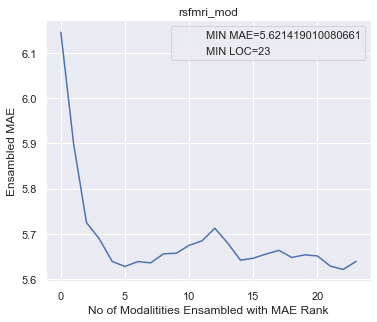

-------


In [61]:
ensamble_sub_modality_groups(sub_modality_group=rsfmri_mod, mae_df=mae_df, df=df, sub_modality_name='rsfmri_mod')

['T2_nonlinear', 'T1_nonlinear', 'T1_linear', 'vbm', 'swi', 'jacobian', 'T2_lesions']


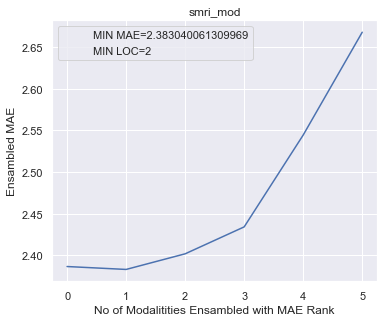

-------
['rsfmri_17', 'rsfmri_18', 'rsfmri_5', 'rsfmri_16', 'rsfmri_0', 'rsfmri_1', 'rsfmri_9', 'rsfmri_12', 'rsfmri_8', 'rsfmri_11', 'rsfmri_4', 'rsfmri_13', 'rsfmri_19', 'rsfmri_24', 'rsfmri_15', 'rsfmri_3', 'rsfmri_23', 'rsfmri_10', 'rsfmri_21', 'rsfmri_2', 'rsfmri_20', 'rsfmri_14', 'rsfmri_22', 'rsfmri_6', 'rsfmri_7']


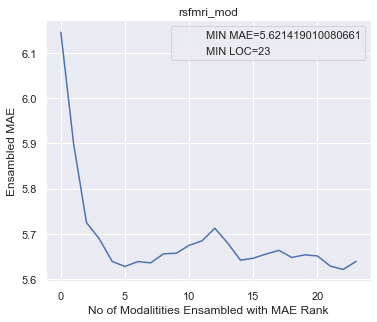

-------
['tfmri_c_1', 'tfmri_c_5', 'tfmri_c_2', 'tfmri_1', 'tfmri_2', 'tfmri_5']


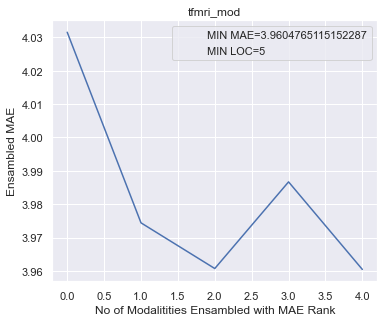

-------
['tbss_ICVF', 'tbss_FA', 'tbss_OD', 'tbss_L1', 'tbss_ISOVF', 'tbss_MD', 'tbss_ICVF_s', 'tbss_L3', 'tbss_L2', 'tbss_MO', 'tbss_FA_s', 'tbss_OD_s', 'tbss_L1_s', 'tracts', 'tbss_MD_s', 'tbss_L2_s', 'tbss_ISOVF_s', 'tbss_L3_s', 'tbss_MO_s']


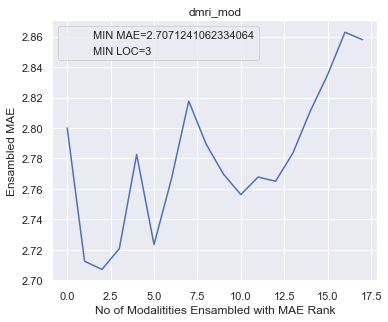

-------
['tbss_ICVF_s', 'tbss_FA_s', 'tbss_OD_s', 'tbss_L1_s', 'tbss_MD_s', 'tbss_L2_s', 'tbss_ISOVF_s', 'tbss_L3_s', 'tbss_MO_s']


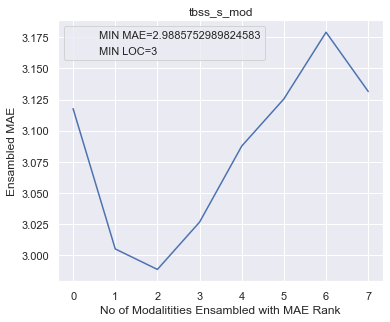

-------
['tbss_ICVF', 'tbss_FA', 'tbss_OD', 'tbss_L1', 'tbss_ISOVF', 'tbss_MD', 'tbss_L3', 'tbss_L2', 'tbss_MO']


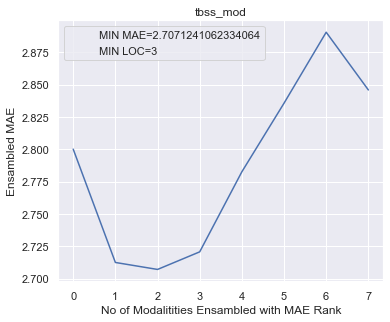

-------
['jacobian', 'rsfmri_17', 'rsfmri_18', 'rsfmri_5', 'rsfmri_16', 'rsfmri_0', 'rsfmri_1', 'rsfmri_9', 'rsfmri_12', 'rsfmri_8', 'rsfmri_11', 'rsfmri_4', 'rsfmri_13', 'rsfmri_19', 'rsfmri_24', 'rsfmri_15', 'rsfmri_3', 'rsfmri_23', 'rsfmri_10', 'rsfmri_21', 'rsfmri_2', 'rsfmri_20', 'rsfmri_14', 'rsfmri_22', 'rsfmri_6', 'rsfmri_7']


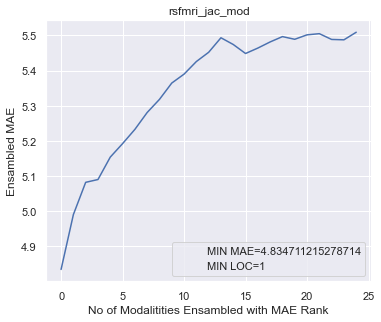

-------
['jacobian', 'tfmri_c_1', 'tfmri_c_5', 'tfmri_c_2', 'tfmri_1', 'tfmri_2', 'tfmri_5']


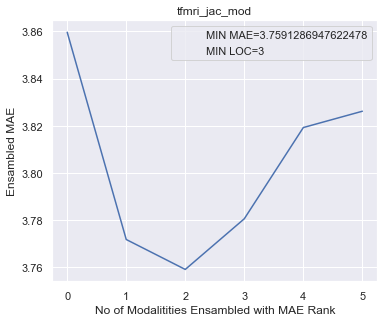

-------
['tfmri_c_1', 'tfmri_c_5', 'tfmri_c_2', 'tfmri_1', 'tfmri_2', 'tfmri_5', 'rsfmri_17', 'rsfmri_18', 'rsfmri_5', 'rsfmri_16', 'rsfmri_0', 'rsfmri_1', 'rsfmri_9', 'rsfmri_12', 'rsfmri_8', 'rsfmri_11', 'rsfmri_4', 'rsfmri_13', 'rsfmri_19', 'rsfmri_24', 'rsfmri_15', 'rsfmri_3', 'rsfmri_23', 'rsfmri_10', 'rsfmri_21', 'rsfmri_2', 'rsfmri_20', 'rsfmri_14', 'rsfmri_22', 'rsfmri_6', 'rsfmri_7']


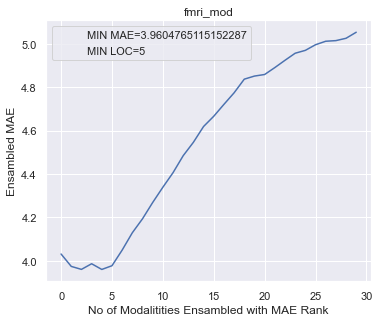

-------
['jacobian', 'tfmri_c_1', 'tfmri_c_5', 'tfmri_c_2', 'tfmri_1', 'tfmri_2', 'tfmri_5', 'rsfmri_17', 'rsfmri_18', 'rsfmri_5', 'rsfmri_16', 'rsfmri_0', 'rsfmri_1', 'rsfmri_9', 'rsfmri_12', 'rsfmri_8', 'rsfmri_11', 'rsfmri_4', 'rsfmri_13', 'rsfmri_19', 'rsfmri_24', 'rsfmri_15', 'rsfmri_3', 'rsfmri_23', 'rsfmri_10', 'rsfmri_21', 'rsfmri_2', 'rsfmri_20', 'rsfmri_14', 'rsfmri_22', 'rsfmri_6', 'rsfmri_7']


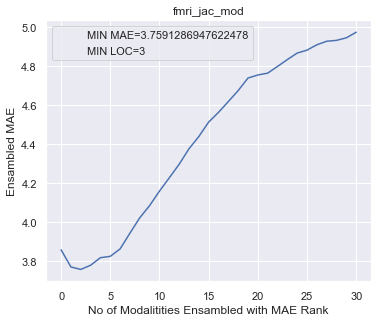

-------
['tbss_ICVF_s', 'tbss_FA_s', 'tbss_OD_s', 'tbss_L1_s', 'tracts', 'tbss_MD_s', 'tbss_L2_s', 'tbss_ISOVF_s', 'tbss_L3_s', 'tbss_MO_s']


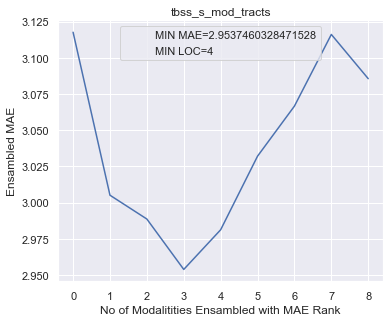

-------
['tbss_ICVF', 'tbss_FA', 'tbss_OD', 'tbss_L1', 'tbss_ISOVF', 'tbss_MD', 'tbss_L3', 'tbss_L2', 'tbss_MO', 'tracts']


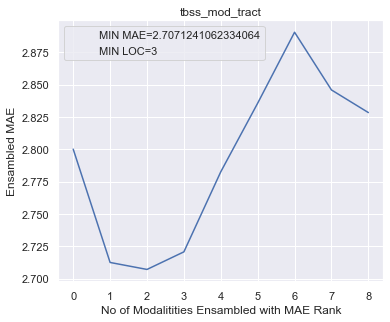

-------


In [62]:
for idx, sub_mod in enumerate(mod_list):
    ensamble_sub_modality_groups(sub_modality_group=sub_mod, mae_df=mae_df, df=df, sub_modality_name=mod_names[idx])
    
    

----
### NOTES 9:
----

Looking at groups of highly correlated data, purely ensambling all or part of them seems to be beneficial for the following:
- rsfmri
- tfmri
- parts of the tbss, tbss skel, and dmri modals (part of them, not complete!)


From below, we can observe a few other things:
- for sMRI: the freatst improvements seem to occur when ensambling "traditional" modalities (T1, T2) as well as the jacobian and swi
- for tfMRI, the trend observed above is confirmed: the more modalities ensambled, generally the better. Possibly, this might be the case for rsfmri, yet I did not test this because of the compuattional overhead.
    - adding the Jacobian in the mix can also lead to some improvements
- for tbss and tbss-s, the things are less clear cut.
    - adding in the tracts can lead to some improvements for tbss and tbss_S

***To try later: Look at isolating the best MAE and best-MAE improvement groups for each subclass, and then ensamble between these. WAIT TO CONFIRM WITH SUPERVISORS THOUGH!***

----

In [63]:
x = naive_ensambling(df, custom_modalities=smri_mod, max_objects=None, verbose=False)
x.sort_values('mae_improvement', ascending=False).head()

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
6,jacobian swi,Unnamed: 0 target_age output_age_decon...,3.942241,3.546692,0.395550
18,jacobian T2_lesions swi,Unnamed: 0 target_age output_age_decon...,3.942241,3.610206,0.332035
10,T1_nonlinear T1_linear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.541832,2.383040,0.158792
2,T1_nonlinear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.541832,2.386541,0.155290
5,jacobian T2_lesions,Unnamed: 0 target_age output_age_decon...,4.287973,4.136575,0.151398


In [64]:
x.sort_values('ensambled_mae').head()

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
10,T1_nonlinear T1_linear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.541832,2.383040,0.158792
2,T1_nonlinear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.541832,2.386541,0.155290
19,T1_nonlinear T1_linear vbm T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.541832,2.401801,0.140031
12,T1_nonlinear vbm T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.541832,2.412760,0.129071
4,T1_linear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.541832,2.418901,0.122931


In [65]:
x = naive_ensambling(df, custom_modalities=tfmri_mod, max_objects=None, verbose=False)
x.sort_values('mae_improvement', ascending=False)

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
24,tfmri_1 tfmri_c_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.628370,4.016253,0.612116
43,tfmri_1 tfmri_5 tfmri_c_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.628370,4.021293,0.607077
52,tfmri_1 tfmri_2 tfmri_5 tfmri_c_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.628370,4.023682,0.604688
40,tfmri_1 tfmri_2 tfmri_c_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.628370,4.047093,0.581276
18,tfmri_1 tfmri_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.628370,4.066133,0.562236
37,tfmri_1 tfmri_2 tfmri_5 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.628370,4.067928,0.560442
47,tfmri_2 tfmri_5 tfmri_c_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.628370,4.076194,0.552175
30,tfmri_2 tfmri_c_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.628370,4.094433,0.533936
54,tfmri_1 tfmri_5 tfmri_c_1 tfmri_c_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.471752,3.944554,0.527198
4,tfmri_1 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.628370,4.110701,0.517668


In [66]:
x = naive_ensambling(df, custom_modalities=tfmri_jac_mod, max_objects=None, verbose=False)
# x.sort_values('mae_improvement', ascending=False)
x.sort_values('ensambled_mae')

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
90,tfmri_c_1 tfmri_c_2 tfmri_c_5 jacobian,Unnamed: 0 target_age output_age_decon...,4.287973,3.759129,0.528844
84,tfmri_2 tfmri_c_1 tfmri_c_5 jacobian,Unnamed: 0 target_age output_age_decon...,4.287973,3.764417,0.523556
74,tfmri_1 tfmri_c_1 tfmri_c_5 jacobian,Unnamed: 0 target_age output_age_decon...,4.287973,3.768269,0.519704
54,tfmri_c_1 tfmri_c_5 jacobian,Unnamed: 0 target_age output_age_decon...,4.287973,3.771814,0.516159
105,tfmri_1 tfmri_c_1 tfmri_c_2 tfmri_c_5 jacobian,Unnamed: 0 target_age output_age_decon...,4.287973,3.780592,0.507381
...,...,...,...,...,...
3,tfmri_1 tfmri_c_2,Unnamed: 0 target_age output_age_decon...,4.642982,4.325983,0.316999
6,tfmri_2 tfmri_5,Unnamed: 0 target_age output_age_decon...,4.846089,4.395723,0.450366
0,tfmri_1 tfmri_2,Unnamed: 0 target_age output_age_decon...,4.674717,4.453903,0.220813
8,tfmri_2 tfmri_c_2,Unnamed: 0 target_age output_age_decon...,4.642982,4.490895,0.152087


In [67]:
x = naive_ensambling(df, custom_modalities=tbss_s_mod, max_objects=None, verbose=False)
x.sort_values('mae_improvement', ascending=False)

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
130,tbss_FA_s tbss_ICVF_s tbss_L1_s tbss_OD_s,Unnamed: 0 target_age output_age_decon...,3.519401,2.988575,0.530826
280,tbss_FA_s tbss_ICVF_s tbss_MD_s tbss_MO_s tbss...,Unnamed: 0 target_age output_age_decon...,3.519401,2.999230,0.520171
270,tbss_FA_s tbss_ICVF_s tbss_L1_s tbss_MO_s tbss...,Unnamed: 0 target_age output_age_decon...,3.519401,3.001011,0.518389
139,tbss_FA_s tbss_ICVF_s tbss_MD_s tbss_OD_s,Unnamed: 0 target_age output_age_decon...,3.519401,3.001932,0.517468
42,tbss_FA_s tbss_ICVF_s tbss_OD_s,Unnamed: 0 target_age output_age_decon...,3.519401,3.005038,0.514363
...,...,...,...,...,...
30,tbss_L3_s tbss_MD_s,Unnamed: 0 target_age output_age_decon...,3.881918,3.777518,0.104400
101,tbss_L1_s tbss_L2_s tbss_MD_s,Unnamed: 0 target_age output_age_decon...,3.704994,3.600822,0.104172
104,tbss_L1_s tbss_L3_s tbss_MD_s,Unnamed: 0 target_age output_age_decon...,3.704994,3.602964,0.102031
231,tbss_L1_s tbss_L2_s tbss_L3_s tbss_MD_s,Unnamed: 0 target_age output_age_decon...,3.704994,3.605382,0.099613


In [68]:
x = naive_ensambling(df, custom_modalities=tbss_mod, max_objects=None, verbose=False)
# x.sort_values('mae_improvement', ascending=False)
x.sort_values('ensambled_mae')

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
122,tbss_FA tbss_ICVF tbss_ISOVF tbss_OD,Unnamed: 0 target_age output_age_decon...,3.071851,2.703327,0.368523
255,tbss_FA tbss_ICVF tbss_ISOVF tbss_MO tbss_OD,Unnamed: 0 target_age output_age_decon...,3.071851,2.703869,0.367981
265,tbss_FA tbss_ICVF tbss_L1 tbss_MO tbss_OD,Unnamed: 0 target_age output_age_decon...,3.071851,2.706230,0.365620
127,tbss_FA tbss_ICVF tbss_L1 tbss_OD,Unnamed: 0 target_age output_age_decon...,3.071851,2.707124,0.364726
375,tbss_FA tbss_ICVF tbss_ISOVF tbss_L1 tbss_MO t...,Unnamed: 0 target_age output_age_decon...,3.071851,2.710598,0.361252
...,...,...,...,...,...
98,tbss_L1 tbss_L2 tbss_L3,Unnamed: 0 target_age output_age_decon...,3.294002,3.293501,0.000501
107,tbss_L2 tbss_L3 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.446519,3.387540,0.058980
29,tbss_L3 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.446519,3.389409,0.057111
26,tbss_L2 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.446519,3.423902,0.022617


In [69]:
x = naive_ensambling(df, custom_modalities=tbss_mod_tract, max_objects=None, verbose=False)
# x.sort_values('mae_improvement', ascending=False)
x.sort_values('ensambled_mae')

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
167,tbss_FA tbss_ICVF tbss_ISOVF tbss_OD,Unnamed: 0 target_age output_age_decon...,3.071851,2.703327,0.368523
388,tbss_FA tbss_ICVF tbss_ISOVF tbss_MO tbss_OD,Unnamed: 0 target_age output_age_decon...,3.071851,2.703869,0.367981
403,tbss_FA tbss_ICVF tbss_L1 tbss_MO tbss_OD,Unnamed: 0 target_age output_age_decon...,3.071851,2.706230,0.365620
173,tbss_FA tbss_ICVF tbss_L1 tbss_OD,Unnamed: 0 target_age output_age_decon...,3.071851,2.707124,0.364726
633,tbss_FA tbss_ICVF tbss_ISOVF tbss_L1 tbss_MO t...,Unnamed: 0 target_age output_age_decon...,3.071851,2.710598,0.361252
...,...,...,...,...,...
42,tbss_MO tracts,Unnamed: 0 target_age output_age_decon...,3.590323,3.329411,0.260912
142,tbss_L2 tbss_L3 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.446519,3.387540,0.058980
34,tbss_L3 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.446519,3.389409,0.057111
30,tbss_L2 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.446519,3.423902,0.022617


In [70]:
x.sort_values('mae_improvement', ascending=False)

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
359,tbss_L2 tbss_L3 tbss_MO tracts,Unnamed: 0 target_age output_age_decon...,3.523005,3.045041,0.477963
156,tbss_L3 tbss_MO tracts,Unnamed: 0 target_age output_age_decon...,3.523005,3.057630,0.465375
150,tbss_L2 tbss_MO tracts,Unnamed: 0 target_age output_age_decon...,3.546928,3.087899,0.459029
366,tbss_L3 tbss_MD tbss_MO tracts,Unnamed: 0 target_age output_age_decon...,3.446519,3.030472,0.416047
35,tbss_L3 tbss_MO,Unnamed: 0 target_age output_age_decon...,3.523005,3.124228,0.398777
...,...,...,...,...,...
747,tbss_ICVF tbss_ISOVF tbss_L1 tbss_L2 tbss_L3 t...,Unnamed: 0 target_age output_age_decon...,3.071851,3.058161,0.013690
336,tbss_L1 tbss_L2 tbss_L3 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.294002,3.292577,0.001426
511,tbss_ICVF tbss_ISOVF tbss_L2 tbss_L3 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.071851,3.071036,0.000814
93,tbss_ICVF tbss_L2 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.071851,3.071210,0.000641


In [71]:
x = naive_ensambling(df, custom_modalities=tbss_s_mod_tracts, max_objects=None, verbose=False)
x.sort_values('mae_improvement', ascending=False)
# x.sort_values('ensambled_mae')

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
337,tbss_ISOVF_s tbss_MD_s tbss_MO_s tracts,Unnamed: 0 target_age output_age_decon...,3.821289,3.239227,0.582062
746,tbss_FA_s tbss_L1_s tbss_MD_s tbss_MO_s tbss_O...,Unnamed: 0 target_age output_age_decon...,3.646106,3.075011,0.571094
247,tbss_FA_s tbss_MD_s tbss_OD_s tracts,Unnamed: 0 target_age output_age_decon...,3.646106,3.078534,0.567571
500,tbss_FA_s tbss_MD_s tbss_MO_s tbss_OD_s tracts,Unnamed: 0 target_age output_age_decon...,3.646106,3.079050,0.567056
410,tbss_FA_s tbss_ICVF_s tbss_L1_s tbss_OD_s tracts,Unnamed: 0 target_age output_age_decon...,3.519401,2.953746,0.565655
...,...,...,...,...,...
35,tbss_L3_s tbss_MD_s,Unnamed: 0 target_age output_age_decon...,3.881918,3.777518,0.104400
131,tbss_L1_s tbss_L2_s tbss_MD_s,Unnamed: 0 target_age output_age_decon...,3.704994,3.600822,0.104172
135,tbss_L1_s tbss_L3_s tbss_MD_s,Unnamed: 0 target_age output_age_decon...,3.704994,3.602964,0.102031
340,tbss_L1_s tbss_L2_s tbss_L3_s tbss_MD_s,Unnamed: 0 target_age output_age_decon...,3.704994,3.605382,0.099613


In [72]:
ordered_modalities= ['rsfmri_0', 'rsfmri_22', 'rsfmri_11', 'rsfmri_17', 'rsfmri_18']

maes_list = []


ensambled_ages_deconfounded = None
for i in range(len(ordered_modalities)):
    
    if ensambled_ages_deconfounded is None:
        ensambled_ages_deconfounded = df.iloc[modalities.index(ordered_modalities[i])].dataframe.output_age_decon.to_numpy()
    else:
        ensambled_ages_deconfounded = ensambled_ages_deconfounded + df.iloc[modalities.index(ordered_modalities[i])].dataframe.output_age_decon.to_numpy()
        
ensambled_ages_deconfounded = ensambled_ages_deconfounded / len(ordered_modalities)

ensambled_deltas_deconfounded = np.subtract(
        ensambled_ages_deconfounded,
        df.iloc[0].dataframe.target_age.to_numpy()    
    )

ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()

print(ensambled_mae)

5.8152975984152615


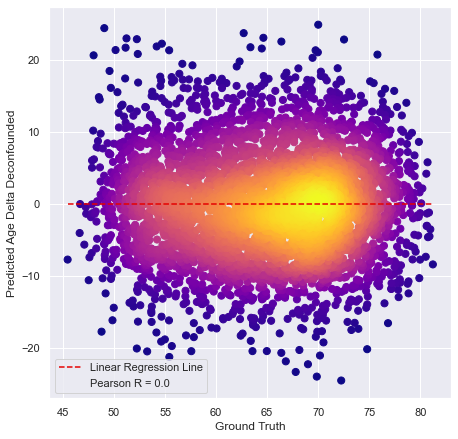

In [73]:
scatter_plot_heatmap(x=df.iloc[0].dataframe.target_age, y=ensambled_deltas_deconfounded, xlabel='Ground Truth', 
                               ylabel='Predicted Age Delta Deconfounded', title=None, set_scale=False, 
                               equality_line=False)

In [74]:
fig = scatter_plot_heatmap(x=x.dataframe.target_age, y=x.dataframe.age_delta_decon, xlabel='Ground Truth', 
                               ylabel='Predicted Age Delta Deconfounded', title=name_ens, set_scale=False, 
                               equality_line=False)

AttributeError: 'Series' object has no attribute 'target_age'